In [1]:
# Include
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as skl
import scipy as sc
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv('../Data/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
import warnings
warnings.filterwarnings('ignore')

# I didnt like how url is listed in the dataframe so i used chatgpt to take the url column and chop it up 

# deleting mashable from the beginning of the url and create a new column called url_name
df['url_name'] = df['url'].str.replace('http://mashable.com/', '')
df.head()
df['url_name'].value_counts()

# Remove the date part at the beginning of each row in 'url_name' column
df['url_name'] = df['url_name'].str.replace(r'^\d+/\d+/\d+/', '')
# Display the updated DataFrame
df.head()

# Extract the date part from the 'URL' column using regular expressions
df['date'] = df['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')

# Display the 'date' column
# print(df['date'])
df.head()
other_columns = [col for col in df.columns if col not in ['url_name', 'date']]
# Specify the desired column order
column_order = ['url_name', 'date'] + other_columns
# Reorder the columns in the DataFrame
df = df[column_order]

#whitespace issue fix 
# for column in df.columns:
#     if df[column].dtype == 'object':  # Only process object (string) columns
#         df[column] = df[column].str.strip()
# # additional whitespace on other columns 
# df.columns.str.strip()
# Remove leading whitespaces from column names
df = df.rename(columns=lambda x: x.strip())

# Display the DataFrame with 'url_name' and 'date' first
df.head()
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Now, when you use df.head(), it will display all columns
df.head()

# df_sunday = df[df['weekday_is_sunday'] == 1]
# print(df_sunday.head())

,url_name,date,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser/,2013/01/07,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets/,2013/01/07,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads/,2013/01/07,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs/,2013/01/07,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps/,2013/01/07,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# check for any missing data
df.isna().sum()

url_name                        0
date                            0
url                             0
timedelta                       0
n_tokens_title                  0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 63, dtype: int64

In [5]:
# Look at the variables
print(df.info())
print(df.describe())
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url_name                       39644 non-null  object 
 1   date                           39644 non-null  object 
 2   url                            39644 non-null  object 
 3   timedelta                      39644 non-null  float64
 4   n_tokens_title                 39644 non-null  float64
 5   n_tokens_content               39644 non-null  float64
 6   n_unique_tokens                39644 non-null  float64
 7   n_non_stop_words               39644 non-null  float64
 8   n_non_stop_unique_tokens       39644 non-null  float64
 9   num_hrefs                      39644 non-null  float64
 10  num_self_hrefs                 39644 non-null  float64
 11  num_imgs                       39644 non-null  float64
 12  num_videos                     39644 non-null 

Index(['url_name', 'date', 'url', 'timedelta', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_po

In [6]:
#Lets change the column date into the proper format datetime and re-order the dataframe in ascending order
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now, the 'date' column is in datetime format and sortable
# You can change the data type to 'object' if needed
df['date'] = df['date'].dt.strftime('%Y/%m/%d')

# Sort the DataFrame in ascending order based on the 'date' column
df = df.sort_values(by='date', ascending=True)

# Display the sorted DataFrame
df.head()



,url_name,date,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser/,2013/01/07,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
57,reeddit-reddit/,2013/01/07,http://mashable.com/2013/01/07/reeddit-reddit/,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,4.546154,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,1300.0,1300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
56,rage-comics-dying/,2013/01/07,http://mashable.com/2013/01/07/rage-comics-dying/,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
55,power-matters-alliance-organization/,2013/01/07,http://mashable.com/2013/01/07/power-matters-a...,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,5.147748,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,1900.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
54,polaroid-android-camera/,2013/01/07,http://mashable.com/2013/01/07/polaroid-androi...,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,4.631390,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3428.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [7]:
#combining all one hot encoded columns for day of the week into one column called day_of_week - it will be categorical

# Change the data type of the columns to 'object'
df['weekday_is_monday']=df['weekday_is_monday'].astype('category')
df['weekday_is_tuesday']=df['weekday_is_tuesday'].astype('category')
df['weekday_is_wednesday']=df['weekday_is_wednesday'].astype('category')
df['weekday_is_thursday']=df['weekday_is_thursday'].astype('category')
df['weekday_is_friday']=df['weekday_is_friday'].astype('category')
df['weekday_is_saturday']=df['weekday_is_saturday'].astype('category')
df['weekday_is_sunday']=df['weekday_is_sunday'].astype('category')

columns_to_convert = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

for column in columns_to_convert:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row['weekday_is_monday'] == 1:
        return 'Monday'
    elif row['weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row['weekday_is_wednesday'] == 1:
        return 'Wednesday'
    elif row['weekday_is_thursday'] == 1:
        return 'Thursday'
    elif row['weekday_is_friday'] == 1:
        return 'Friday'
    elif row['weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row['weekday_is_sunday'] == 1:
        return 'Sunday'
    else:
        return None
    return None  # Return None for rows with no day selected

# Apply the function to each row and create a new column 'day'
df['day_of_week'] = df.apply(map_to_day, axis=1)

df.head()

print(df)


                                   url_name        date  \
0             amazon-instant-video-browser/  2013/01/07   
57                          reeddit-reddit/  2013/01/07   
56                       rage-comics-dying/  2013/01/07   
55     power-matters-alliance-organization/  2013/01/07   
54                 polaroid-android-camera/  2013/01/07   
...                                     ...         ...   
39626                  christmas-tree-bugs/  2014/12/27   
39625        als-ice-bucket-challenge-swim/  2014/12/27   
39624               air-asia-flight-qz8501/  2014/12/27   
39632                  las-vegas-new-years/  2014/12/27   
39643                youtube-channels-2015/  2014/12/27   

                                                     url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
57        http://mashable.com/2013/01/07/reeddit-reddit/      731.0   
56     http://mashable.com/2013/01/07/rage-comics-dying/      731.0   
55     

Wednesday    7435
Tuesday      7390
Thursday     7267
Monday       6661
Friday       5701
Sunday       2737
Saturday     2453
Name: day_of_week, dtype: int64


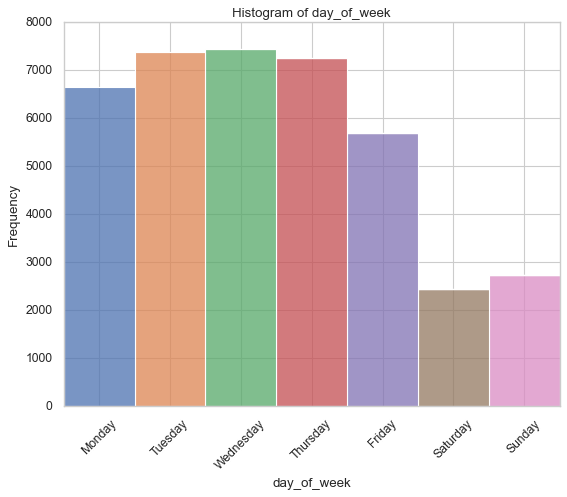

In [8]:
# Frequency count of our categorical response variables day_of_week

print(df['day_of_week'].value_counts())
# df['day_of_week'].value_counts().plot(kind='bar')
categorical_variables = ['day_of_week']
# Group the DataFrame by the categorical variables

sns.set(style="whitegrid")

# Create a single figure for all subplots
plt.figure()

# Loop through categorical variables
for column in categorical_variables:
    grouped_df_days = df.groupby(column)
    
    # Create a histogram for each group using Seaborn without KDE
    ax = sns.histplot(data=df, x=column, hue=column, multiple="stack", bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    labels = df[column].unique()

    legend = ax.legend(labels=labels, title=column, loc='lower left')
    legend.set_visible(False)  # Hide the legend

    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the single figure with all subplots
plt.show()


In [9]:
# one hot encoded data channels moved to one categorical column - news_category -- another possible response variable for classification model

# Change the data type of the columns to 'object'
df['data_channel_is_lifestyle']=df['data_channel_is_lifestyle'].astype('category')
df['data_channel_is_entertainment']=df['data_channel_is_entertainment'].astype('category')
df['data_channel_is_bus']=df['data_channel_is_bus'].astype('category')
df['data_channel_is_socmed']=df['data_channel_is_socmed'].astype('category')
df['data_channel_is_tech']=df['data_channel_is_tech'].astype('category')
df['data_channel_is_world']=df['data_channel_is_world'].astype('category')

columns_to_convert_channel = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
    'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

for column in columns_to_convert_channel:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social_Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World_News'
    else:
        return None
    return None  # Return None for rows with no day selected

# Apply the function to each row and create a new column 'day'
df['news_category'] = df.apply(map_to_day, axis=1)

df.head()



,url_name,date,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category
0,amazon-instant-video-browser/,2013/01/07,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment
57,reeddit-reddit/,2013/01/07,http://mashable.com/2013/01/07/reeddit-reddit/,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,4.546154,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,1300.0,1300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech
56,rage-comics-dying/,2013/01/07,http://mashable.com/2013/01/07/rage-comics-dying/,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,None
55,power-matters-alliance-organization/,2013/01/07,http://mashable.com/2013/01/07/power-matters-a...,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,5.147748,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,1900.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech
54,polaroid-android-camera/,2013/01/07,http://mashable.com/2013/01/07/polaroid-androi...,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,4.631390,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3428.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech


In [10]:
# None-values were found and were then move to the category Uncategorized within the news_category column  

print(len(df))
print(df['news_category'].value_counts())
# Check for missing values in the news_category column
is_null = df['news_category'].isnull()
# Get the value count of the is_null Series
value_counts = is_null.value_counts()
# Print the value count for what comes back as True
print(value_counts[True])


# Fill missing values in the news_category column with "Other"
df['news_category'].fillna('Uncategorized', inplace=True)



39644
World_News       8427
Tech             7346
Entertainment    7057
Business         6258
Social_Media     2323
Lifestyle        2099
Name: news_category, dtype: int64
6134


In [11]:
print(df['news_category'].value_counts())
print(len(df))
df.columns

World_News       8427
Tech             7346
Entertainment    7057
Business         6258
Uncategorized    6134
Social_Media     2323
Lifestyle        2099
Name: news_category, dtype: int64
39644


Index(['url_name', 'date', 'url', 'timedelta', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_po

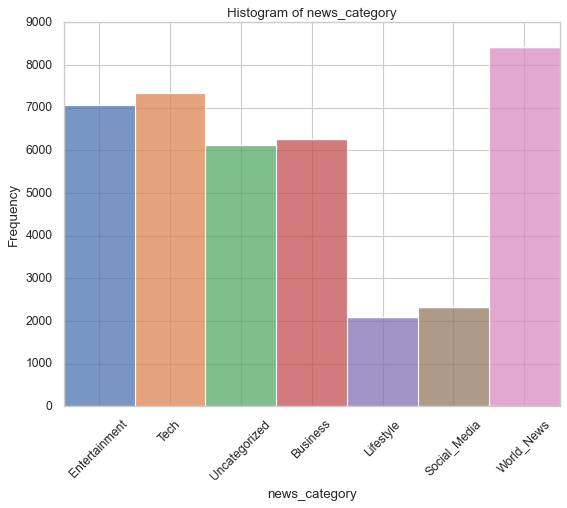

In [12]:
# Frequency count by news_category 

categorical_variables = ['news_category']
# Group the DataFrame by the categorical variables
for column in categorical_variables:
  grouped_df = df.groupby(column)


sns.set(style="whitegrid")

# Create a single figure for all subplots
plt.figure()

# Loop through categorical variables
for column in categorical_variables:
    grouped_df = df.groupby(column)
    labels = df[column].unique()

    # Create a histogram for each group using Seaborn without KDE
    ax = sns.histplot(data=df, x=column, hue=column, multiple="stack", bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    legend = ax.legend(labels=labels, title=column, loc='lower left')
    legend.set_visible(False)  # Hide the legend
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the single figure with all subplots
plt.show()



In [13]:
# take date column and break it down into two more columns date and year for additional categorical variables 

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,url_name,date,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month
0,amazon-instant-video-browser/,2013-01-07,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1
57,reeddit-reddit/,2013-01-07,http://mashable.com/2013/01/07/reeddit-reddit/,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,4.546154,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,1300.0,1300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1
56,rage-comics-dying/,2013-01-07,http://mashable.com/2013/01/07/rage-comics-dying/,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1
55,power-matters-alliance-organization/,2013-01-07,http://mashable.com/2013/01/07/power-matters-a...,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,5.147748,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,1900.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1
54,polaroid-android-camera/,2013-01-07,http://mashable.com/2013/01/07/polaroid-androi...,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,4.631390,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3428.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1


2014    21445
2013    18199
Name: year, dtype: int64


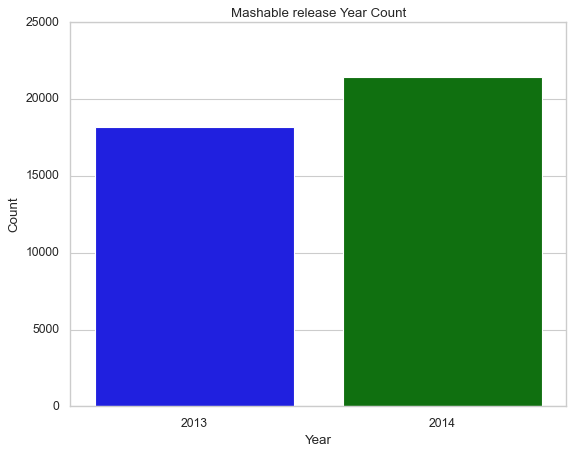

In [14]:
# Bar plot of count of mashable articles associated with year 2013 and 2014 

df['year'].astype('category')
print(df['year'].value_counts())
# print(df['year'].value_counts().plot(kind='pie'))
# print(df['year'].value_counts().plot(kind='bar'))
# colors = ['blue', 'green']

# Get the value counts of 'year'
year_counts = df['year'].value_counts().sort_index()

# Define colors for the bars
colors = ['blue', 'green']

# Create a bar plot with Seaborn
sns.set(style="whitegrid")  # Optional style customization
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette=colors)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Mashable release Year Count')

plt.show()


10    3865
7     3622
9     3412
6     3365
8     3342
4     3284
11    3278
5     3225
3     3088
2     3081
12    3074
1     3008
Name: month, dtype: int64


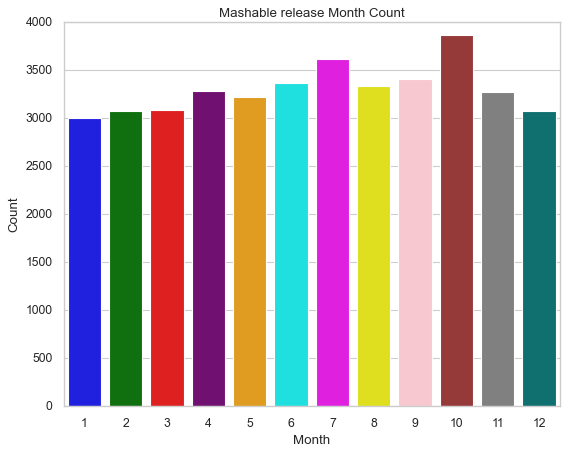

In [15]:
# Bar plot of frequency of mashable article by month 

df['month'].astype('category')
print(df['month'].value_counts())
# print(df['year'].value_counts().plot(kind='pie'))
# print(df['year'].value_counts().plot(kind='bar'))
# colors = ['blue', 'green']

# Get the value counts of 'year'
year_counts = df['month'].value_counts().sort_index()

# Define colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'teal']

# Create a bar plot with Seaborn
sns.set(style="whitegrid")  # Optional style customization
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette=colors)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Mashable release Month Count')

plt.show()

0.0    34454
1.0     5190
Name: is_weekend, dtype: int64


Text(0.5, 1.0, 'Mashable release is_weekend Count')

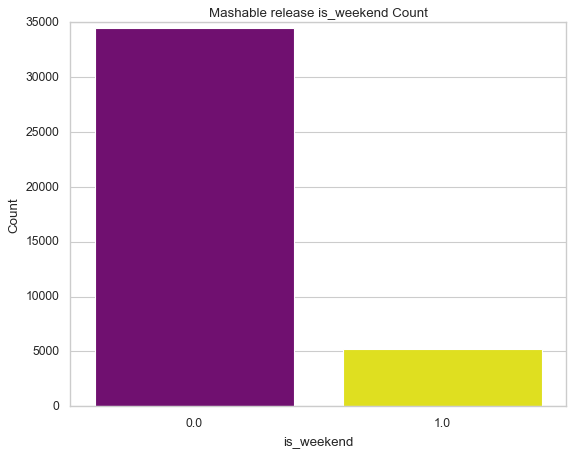

In [16]:
# Frequency count for is_weekend categorical variable 

df['is_weekend'].astype('category')
print(df['is_weekend'].value_counts())
# print(df['year'].value_counts().plot(kind='pie'))
# print(df['year'].value_counts().plot(kind='bar'))
# colors = ['blue', 'green']

# Get the value counts of 'year'
is_weekend_counts = df['is_weekend'].value_counts().sort_index()

# Define colors for the bars
colors = ['purple', 'yellow']

# Create a bar plot with Seaborn
sns.set(style="whitegrid")  # Optional style customization
ax = sns.barplot(x=is_weekend_counts.index, y=is_weekend_counts.values, palette=colors)

plt.xlabel('is_weekend')
plt.ylabel('Count')
plt.title('Mashable release is_weekend Count')


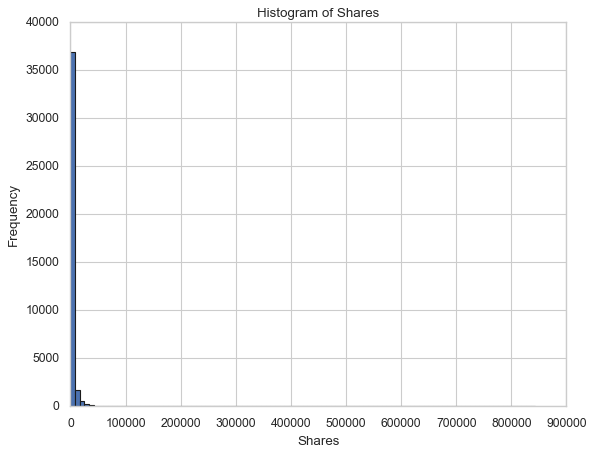

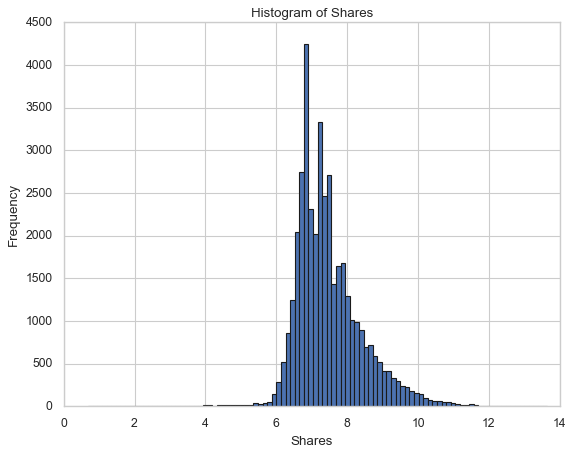

In [17]:
# Shares - log transform 

# For regression our continous variable will be shares
plt.hist(df['shares'], bins=1000, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Histogram of Shares')
plt.grid(True)
plt.show()

# shares looks like a variable that can be log transformed to be more normally distributed 
# For regression our continous variable will be shares
df['log_shares'] = np.log1p(df['shares'])
plt.hist(df['log_shares'], bins=1000, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Histogram of Shares')
plt.grid(True)
plt.show()



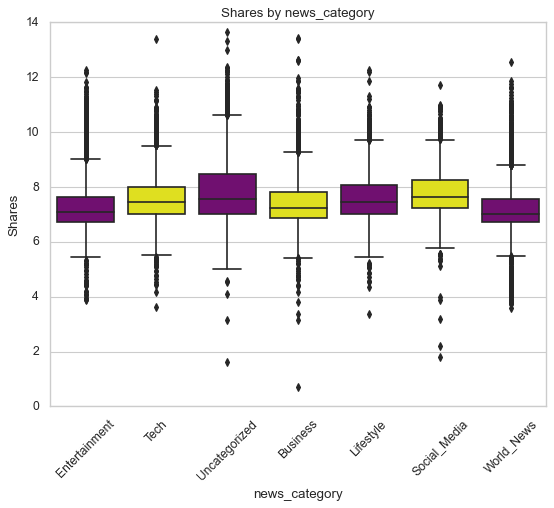

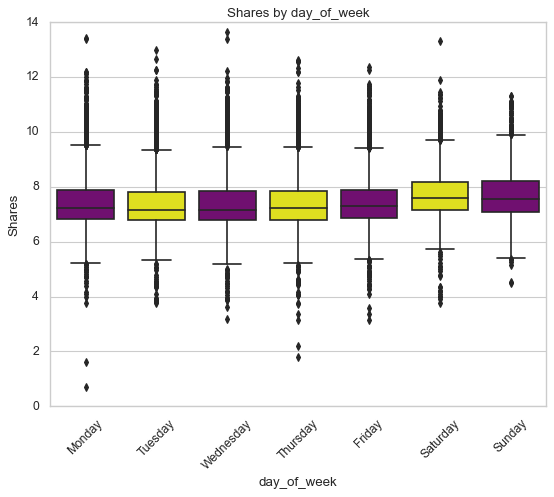

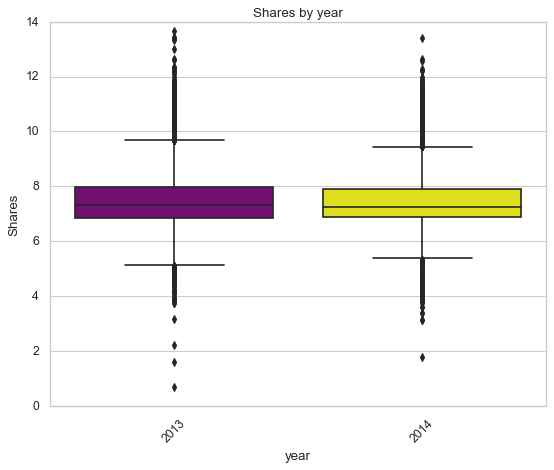

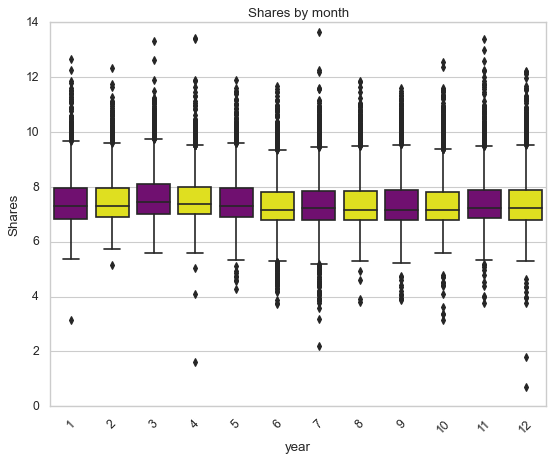

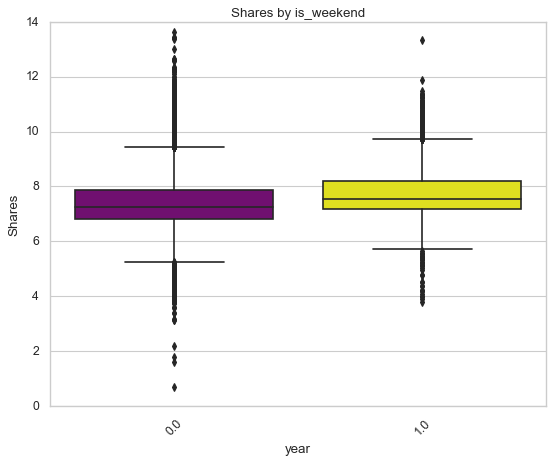

In [18]:
# Explore Joint Attributes shares versus ***

#shares versus news_category

# Create a bar plot with Seaborn
# df['log_shares'] = np.log1p(df['shares'])
# Create a bar plot with Seaborn
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['news_category'], y=df['log_shares'], palette=colors)

plt.xlabel('news_category')
plt.ylabel('Shares')
plt.title('Shares by news_category')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


#shares versus day_of_week 

sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['day_of_week'], y=df['log_shares'], palette=colors)
plt.xlabel('day_of_week')
plt.ylabel('Shares')
plt.title('Shares by day_of_week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus year 
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['year'], y=df['log_shares'], palette=colors)
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus month
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['month'], y=df['log_shares'], palette=colors)
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# shares versus is_weekend 
sns.set(style="whitegrid")  # Optional style customization
ax = sns.boxplot(x=df['is_weekend'], y=df['log_shares'], palette=colors)
plt.xlabel('year')
plt.ylabel('Shares')
plt.title('Shares by is_weekend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [19]:
df.head()

# We should drop some redundant columns that we combined into one column 

columns_to_drop = [
    'url', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
    'weekday_is_saturday', 'weekday_is_sunday'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
df.head()

print(df.info())


print(df.dtypes)
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   url_name                      39644 non-null  object        
 1   date                          39644 non-null  datetime64[ns]
 2   timedelta                     39644 non-null  float64       
 3   n_tokens_title                39644 non-null  float64       
 4   n_tokens_content              39644 non-null  float64       
 5   n_unique_tokens               39644 non-null  float64       
 6   n_non_stop_words              39644 non-null  float64       
 7   n_non_stop_unique_tokens      39644 non-null  float64       
 8   num_hrefs                     39644 non-null  float64       
 9   num_self_hrefs                39644 non-null  float64       
 10  num_imgs                      39644 non-null  float64       
 11  num_videos                  

,url_name,date,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879
57,reeddit-reddit/,2013-01-07,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,1300.0,1300.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888
56,rage-comics-dying/,2013-01-07,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974
55,power-matters-alliance-organization/,2013-01-07,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,1900.0,1900.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384
54,polaroid-android-camera/,2013-01-07,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3428.6,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641


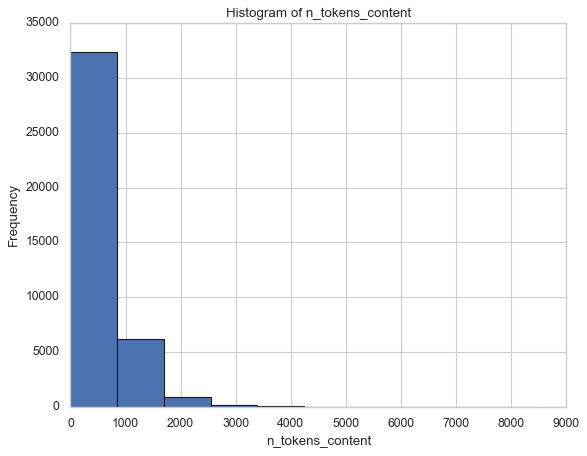

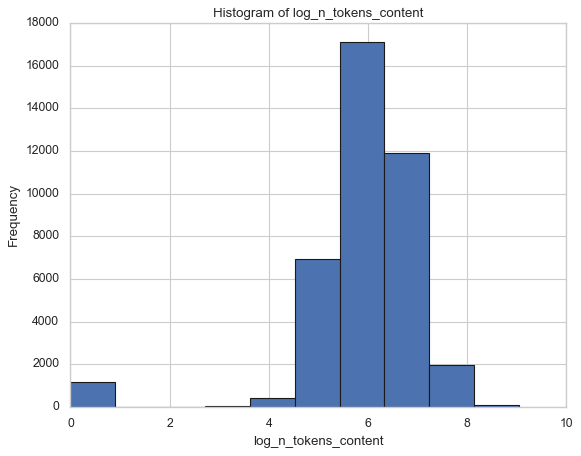

In [20]:
# n_tokens_title - log transformed 

plt.hist(df['n_tokens_content'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('n_tokens_content')
plt.ylabel('Frequency')
plt.title('Histogram of n_tokens_content')
plt.grid(True)
plt.show()


df['log_n_tokens_content'] = np.log1p(df['n_tokens_content'])
plt.hist(df['log_n_tokens_content'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_tokens_content')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_tokens_content')
plt.grid(True)
plt.show()


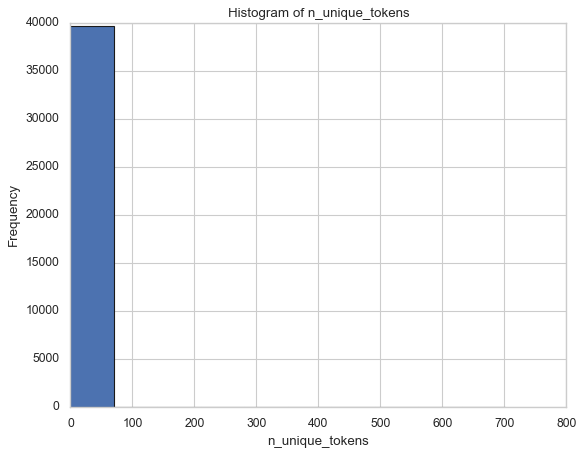

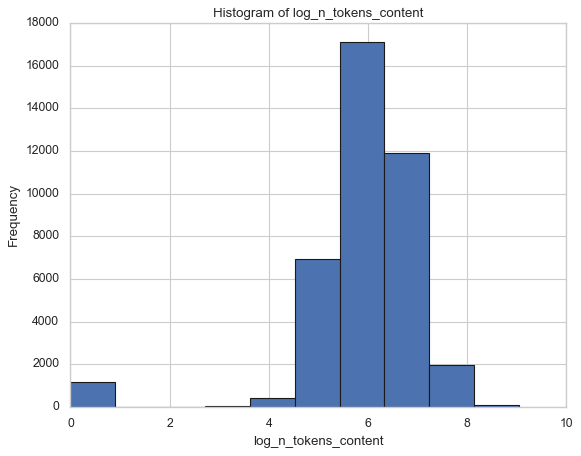

In [21]:
# n_unique_tokens - log transformed to be more normally distributed 

plt.hist(df['n_unique_tokens'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('n_unique_tokens')
plt.ylabel('Frequency')
plt.title('Histogram of n_unique_tokens')
plt.grid(True)
plt.show()


df['log_n_tokens_content'] = np.log1p(df['n_tokens_content'])
plt.hist(df['log_n_tokens_content'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_n_tokens_content')
plt.ylabel('Frequency')
plt.title('Histogram of log_n_tokens_content')
plt.grid(True)
plt.show()


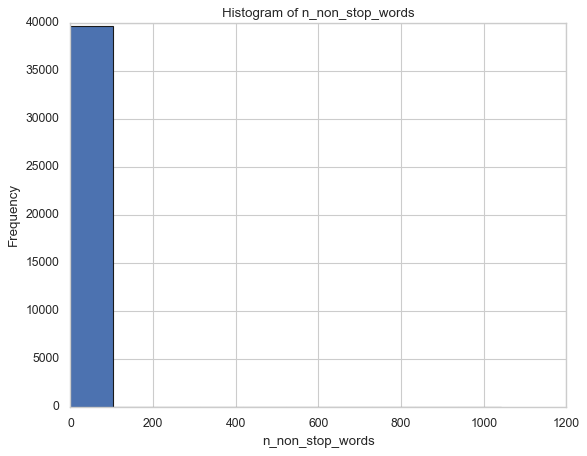

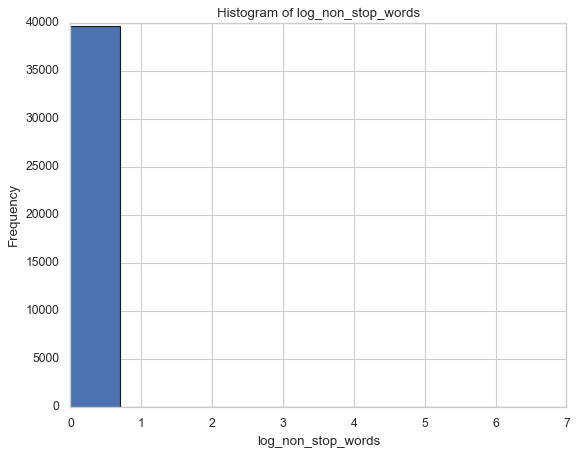

In [22]:
# non_stop_words - this column can be dropped either 0.99999 or 1 value 

plt.hist(df['n_non_stop_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('n_non_stop_words')
plt.ylabel('Frequency')
plt.title('Histogram of n_non_stop_words')
plt.grid(True)
plt.show()


df['log_non_stop_words'] = np.log1p(df['n_non_stop_words'])
plt.hist(df['log_non_stop_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_non_stop_words')
plt.ylabel('Frequency')
plt.title('Histogram of log_non_stop_words')
plt.grid(True)
plt.show()

df.drop(columns=['n_non_stop_unique_tokens'], inplace=True)


In [23]:
# # n_non_stop_unique_tokens - log transformed to be more normally distributed 

# plt.hist(df['n_non_stop_unique_tokens'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('n_non_stop_unique_tokens')
# plt.ylabel('Frequency')
# plt.title('Histogram of n_non_stop_unique_tokens')
# plt.grid(True)
# plt.show()


# df['log_n_non_stop_unique_tokens'] = np.log1p(df['n_non_stop_unique_tokens'])
# plt.hist(df['log_n_non_stop_unique_tokens'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_n_non_stop_unique_tokens')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_n_non_stop_unique_tokens')
# plt.grid(True)
# plt.show()



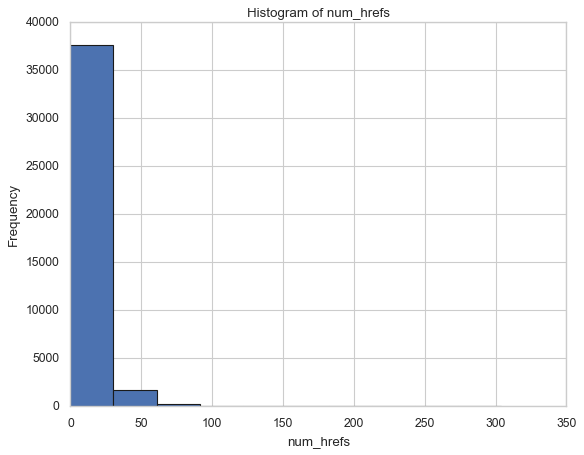

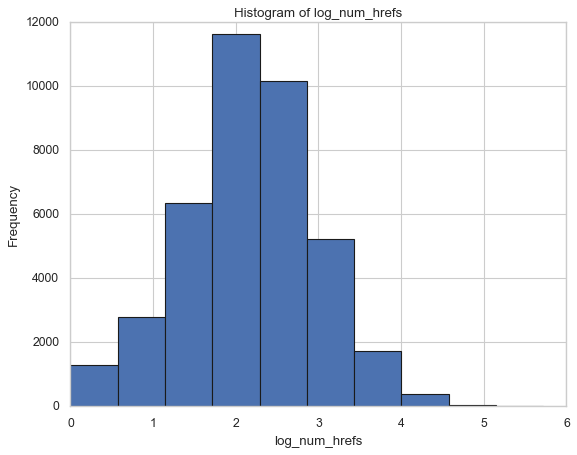

In [24]:
# num_hrefs - log transformed to be more normally distributed 

plt.hist(df['num_hrefs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


df['log_num_hrefs'] = np.log1p(df['num_hrefs'])
plt.hist(df['log_num_hrefs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_hrefs')
plt.grid(True)
plt.show()

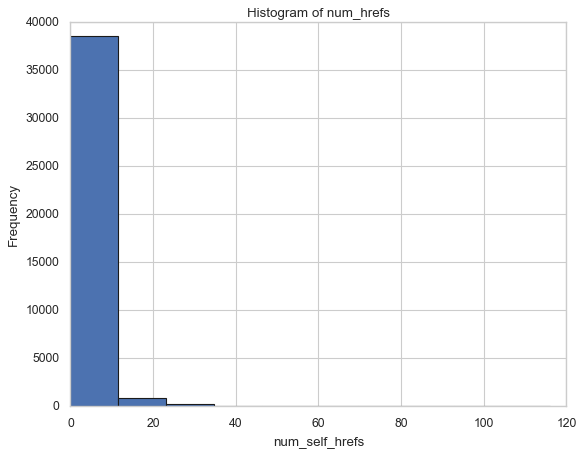

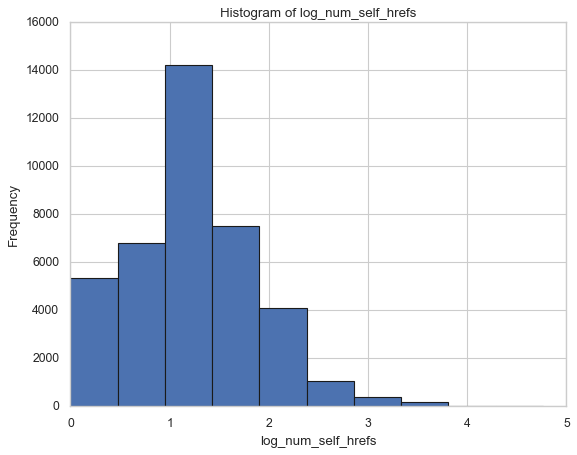

In [25]:
# num_self_hrefs - log transformed to be more normally distributed 

plt.hist(df['num_self_hrefs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_self_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


df['log_num_self_hrefs'] = np.log1p(df['num_self_hrefs'])
plt.hist(df['log_num_self_hrefs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_self_hrefs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_self_hrefs')
plt.grid(True)
plt.show()

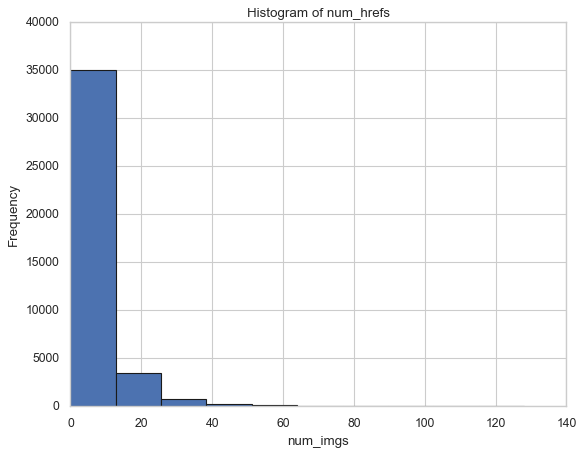

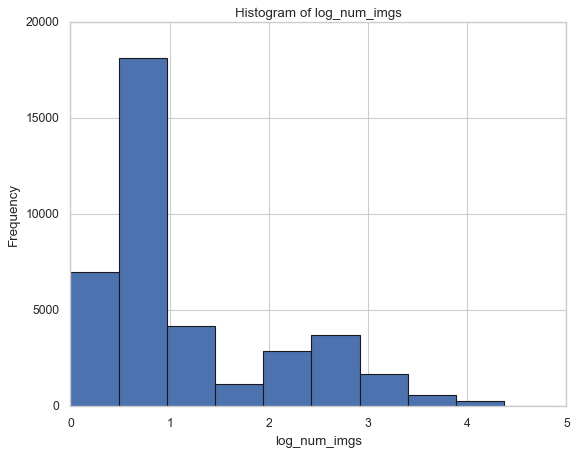

In [26]:
# num_imgs - log transformed to be more normally distributed 

plt.hist(df['num_imgs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_imgs')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


df['log_num_imgs'] = np.log1p(df['num_imgs'])
plt.hist(df['log_num_imgs'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_imgs')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_imgs')
plt.grid(True)
plt.show()

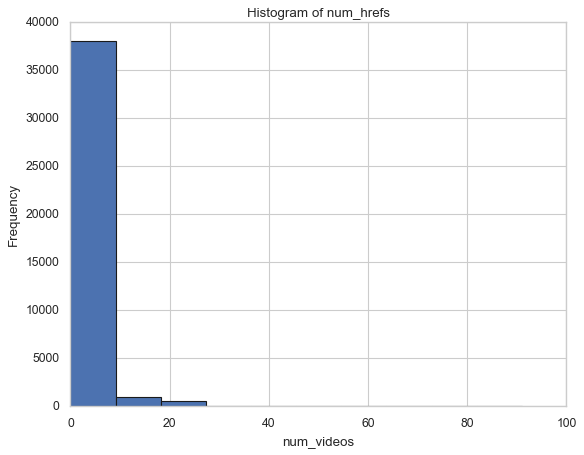

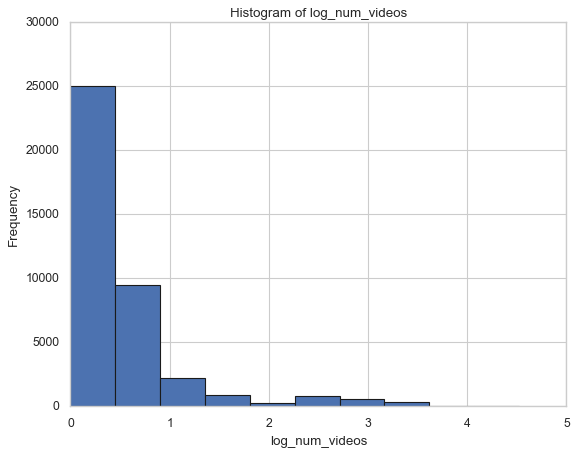

In [27]:
# num_videos - log transformed to be more normally distributed 

plt.hist(df['num_videos'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_videos')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


df['log_num_videos'] = np.log1p(df['num_videos'])
plt.hist(df['log_num_videos'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_videos')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_videos')
plt.grid(True)
plt.show()

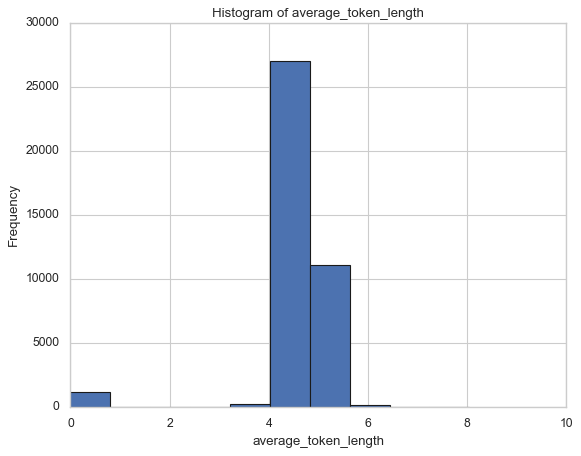

In [28]:
# average_token_length - wont log transform but evidence of outlier 

plt.hist(df['average_token_length'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('average_token_length')
plt.ylabel('Frequency')
plt.title('Histogram of average_token_length')
plt.grid(True)
plt.show()



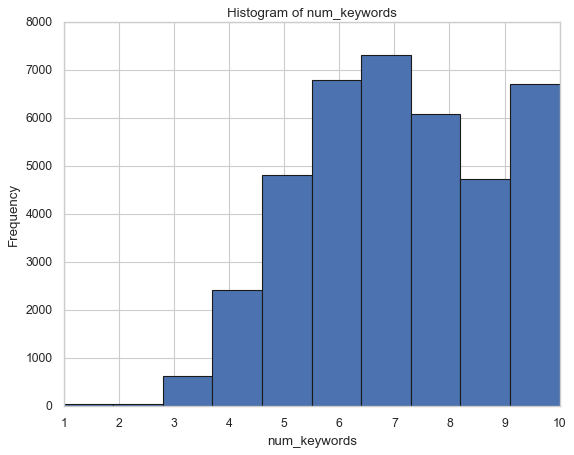

In [29]:
# num_keywords - wont log transform but evidence of outlier 

plt.hist(df['num_keywords'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_keywords')
plt.ylabel('Frequency')
plt.title('Histogram of num_keywords')
plt.grid(True)
plt.show()



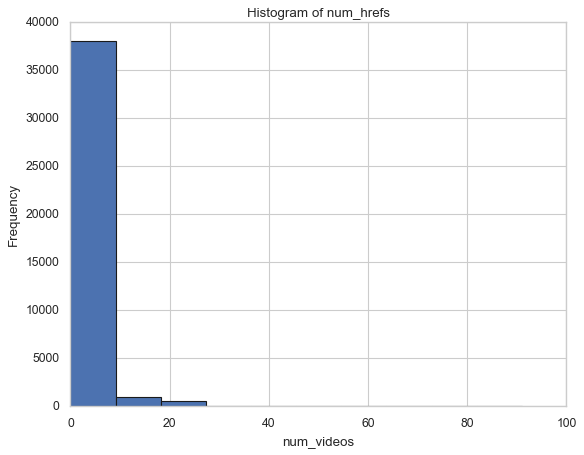

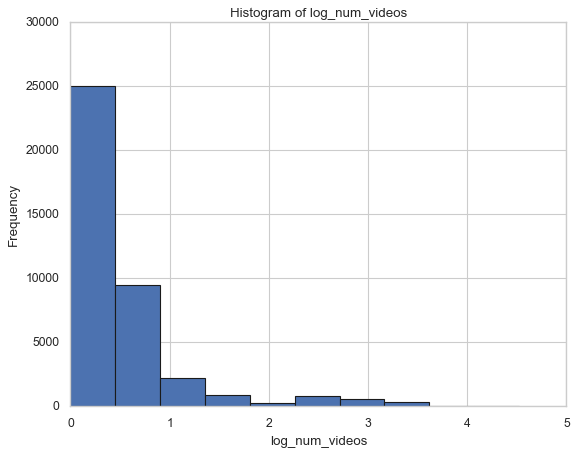

In [30]:
# num_videos - log transformed to be more normally distributed 

plt.hist(df['num_videos'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('num_videos')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


df['log_num_videos'] = np.log1p(df['num_videos'])
plt.hist(df['log_num_videos'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_num_videos')
plt.ylabel('Frequency')
plt.title('Histogram of log_num_videos')
plt.grid(True)
plt.show()

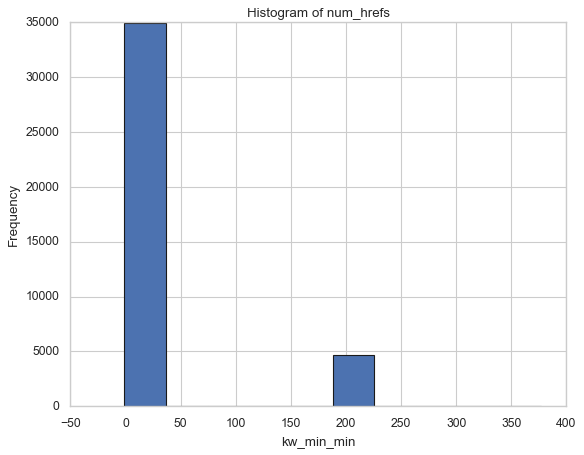

In [31]:
# kw_min_min - couldnt log ran into range error will leave alone 

plt.hist(df['kw_min_min'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('kw_min_min')
plt.ylabel('Frequency')
plt.title('Histogram of num_hrefs')
plt.grid(True)
plt.show()


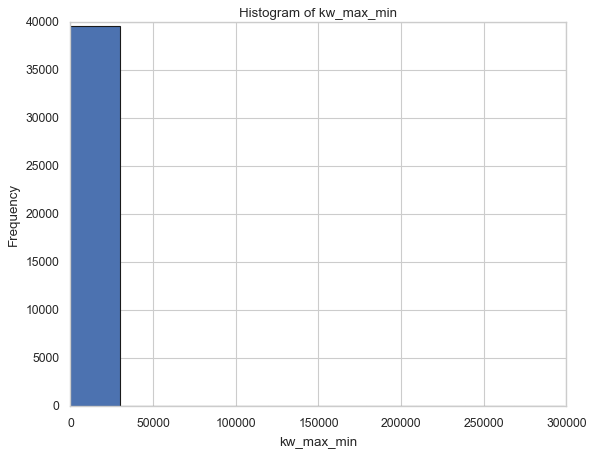

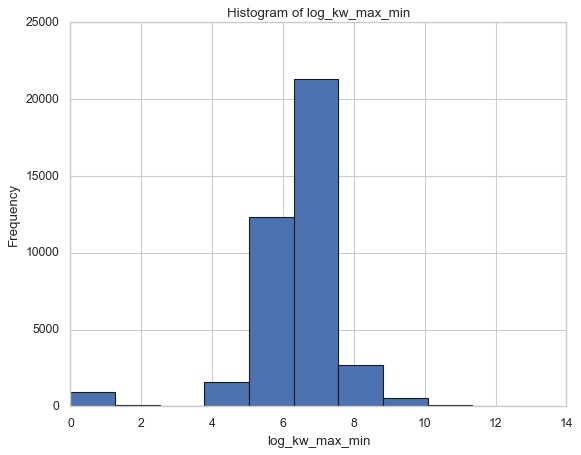

In [32]:
# kw_max_min - log transformed to be more normally distributed 

plt.hist(df['kw_max_min'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('kw_max_min')
plt.ylabel('Frequency')
plt.title('Histogram of kw_max_min')
plt.grid(True)
plt.show()


df['log_kw_max_min'] = np.log1p(df['kw_max_min'])
plt.hist(df['log_kw_max_min'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_max_min')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_max_min')
plt.grid(True)
plt.show()

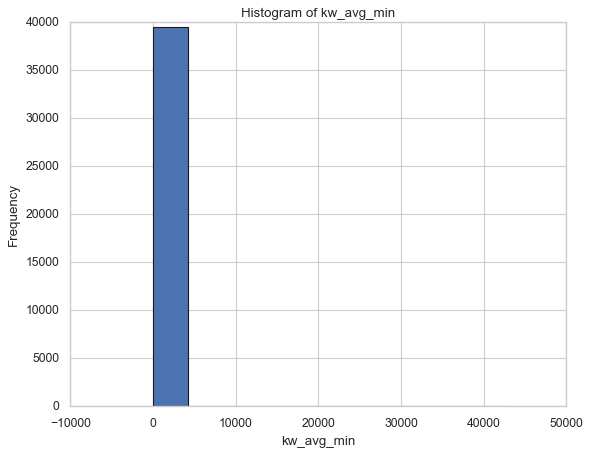

In [33]:
# kw_avg_min - will leave alone ran into the same range issue as before with kw_min_min

plt.hist(df['kw_avg_min'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('kw_avg_min')
plt.ylabel('Frequency')
plt.title('Histogram of kw_avg_min')
plt.grid(True)
plt.show()


# df['log_kw_avg_min'] = np.log1p(df['kw_avg_min'])
# plt.hist(df['log_kw_avg_min'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_kw_avg_min')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_kw_avg_min')
# plt.grid(True)
# plt.show()

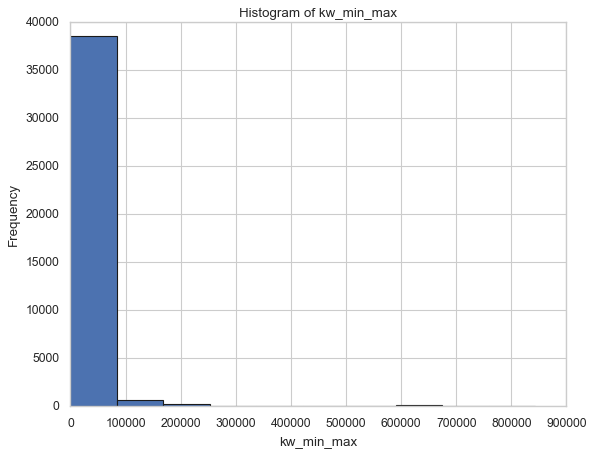

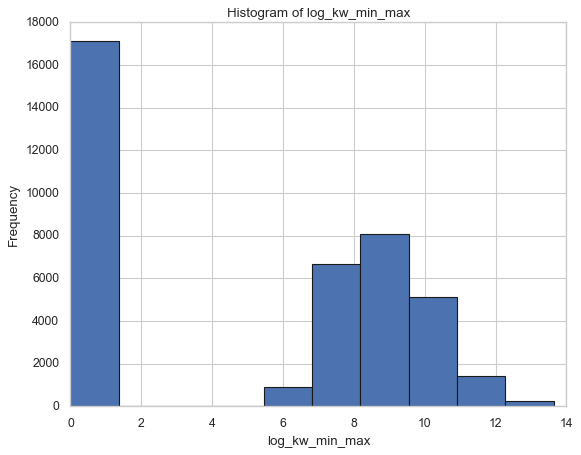

In [34]:
# kw_min_max - will leave alone ran into the same range issue as before with kw_min_min

plt.hist(df['kw_min_max'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('kw_min_max')
plt.ylabel('Frequency')
plt.title('Histogram of kw_min_max')
plt.grid(True)
plt.show()


df['log_kw_min_max'] = np.log1p(df['kw_min_max'])
plt.hist(df['log_kw_min_max'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_min_max')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_min_max')
plt.grid(True)
plt.show()

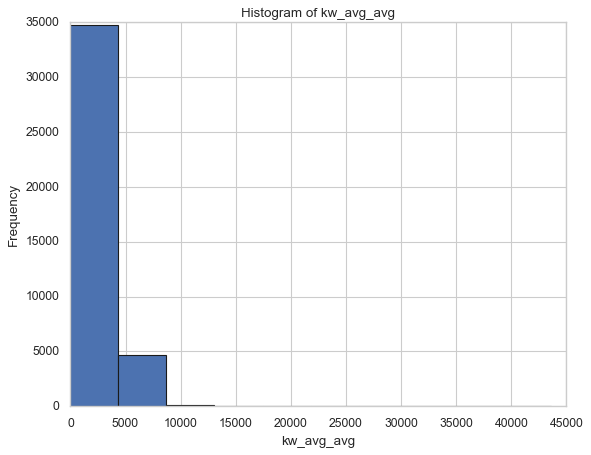

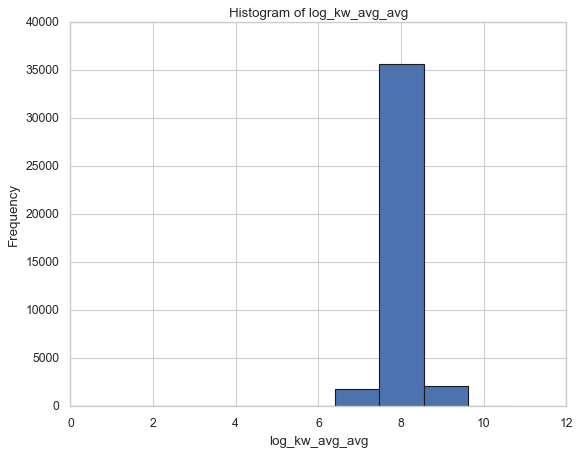

In [35]:
# kw_avg_avg - log transformed helped, outlier present

plt.hist(df['kw_avg_avg'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('kw_avg_avg')
plt.ylabel('Frequency')
plt.title('Histogram of kw_avg_avg')
plt.grid(True)
plt.show()


df['log_kw_avg_avg'] = np.log1p(df['kw_avg_avg'])
plt.hist(df['log_kw_avg_avg'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_kw_avg_avg')
plt.ylabel('Frequency')
plt.title('Histogram of log_kw_avg_avg')
plt.grid(True)
plt.show()

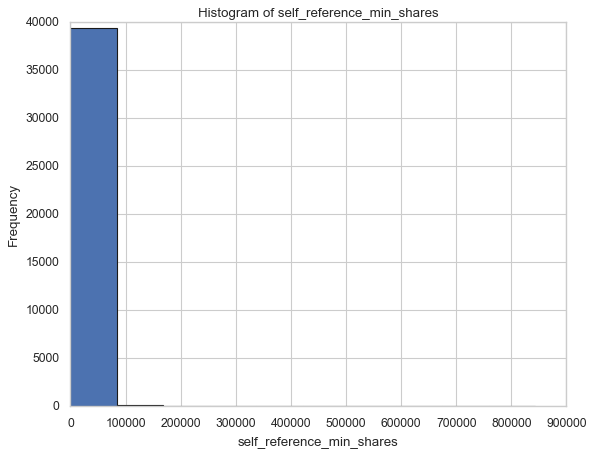

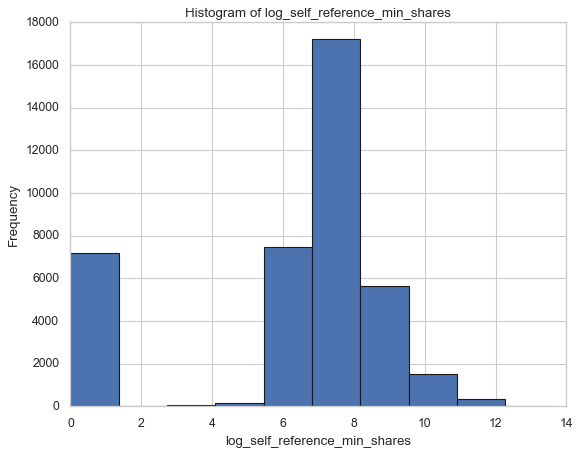

In [36]:
# self_reference_min_shares - log transformed helped, outlier present

plt.hist(df['self_reference_min_shares'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('self_reference_min_shares')
plt.ylabel('Frequency')
plt.title('Histogram of self_reference_min_shares')
plt.grid(True)
plt.show()


df['log_self_reference_min_shares'] = np.log1p(df['self_reference_min_shares'])
plt.hist(df['log_self_reference_min_shares'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_min_shares')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_min_shares')
plt.grid(True)
plt.show()

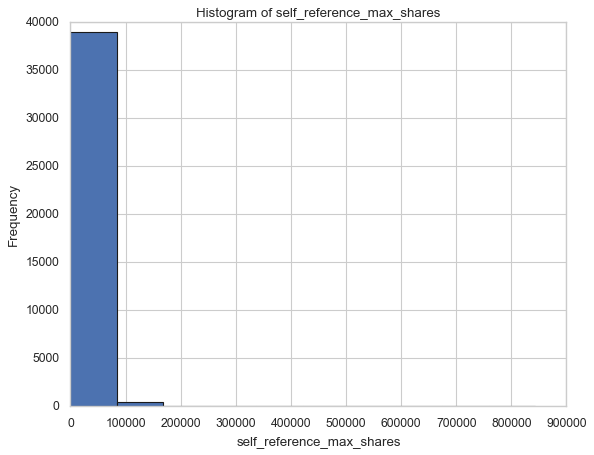

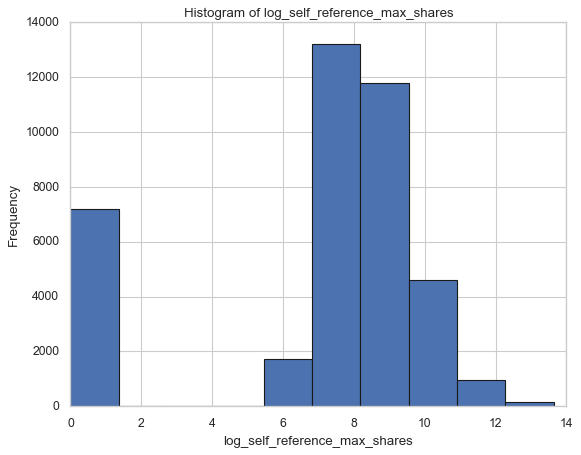

In [37]:
# self_reference_max_shares - log transformed helped, outlier present

plt.hist(df['self_reference_max_shares'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('self_reference_max_shares')
plt.ylabel('Frequency')
plt.title('Histogram of self_reference_max_shares')
plt.grid(True)
plt.show()


df['log_self_reference_max_shares'] = np.log1p(df['self_reference_max_shares'])
plt.hist(df['log_self_reference_max_shares'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_max_shares')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_max_shares')
plt.grid(True)
plt.show()

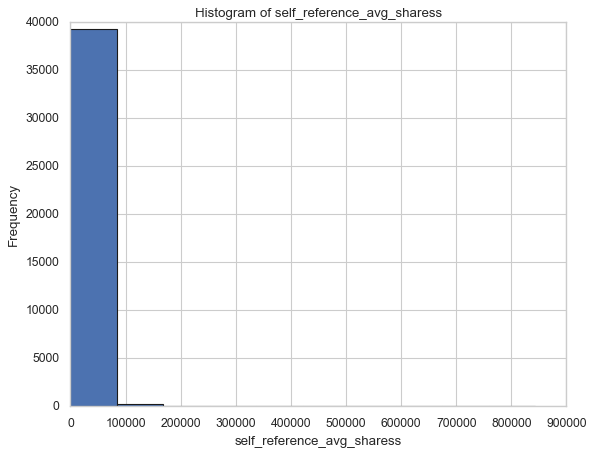

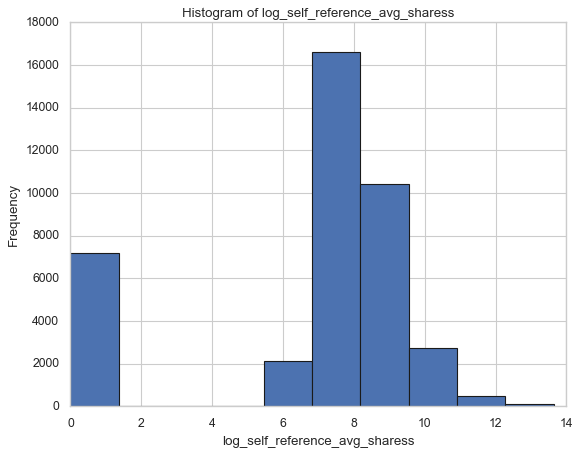

In [38]:
# self_reference_avg_sharess - log transformed helped, outlier present

plt.hist(df['self_reference_avg_sharess'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('self_reference_avg_sharess')
plt.ylabel('Frequency')
plt.title('Histogram of self_reference_avg_sharess')
plt.grid(True)
plt.show()


df['log_self_reference_avg_sharess'] = np.log1p(df['self_reference_avg_sharess'])
plt.hist(df['log_self_reference_avg_sharess'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('log_self_reference_avg_sharess')
plt.ylabel('Frequency')
plt.title('Histogram of log_self_reference_avg_sharess')
plt.grid(True)
plt.show()

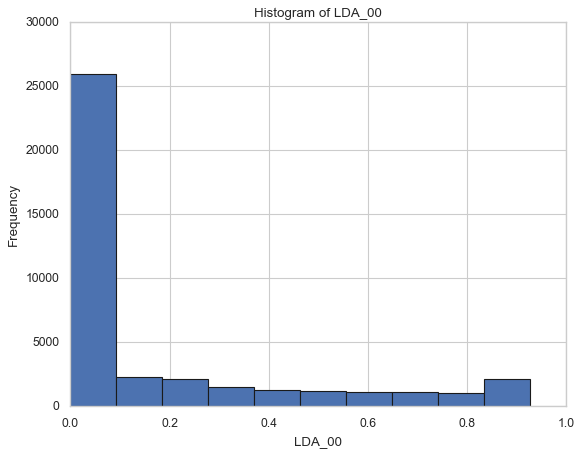

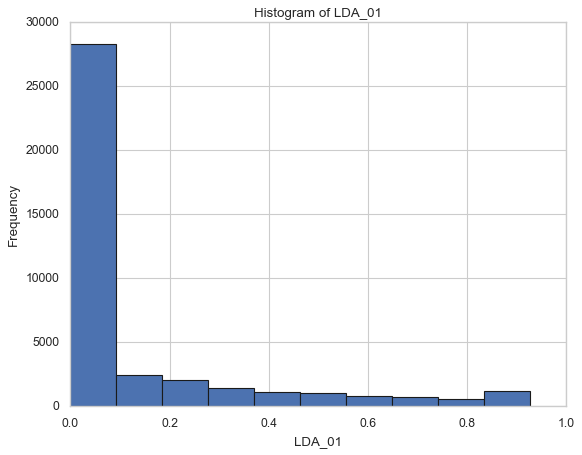

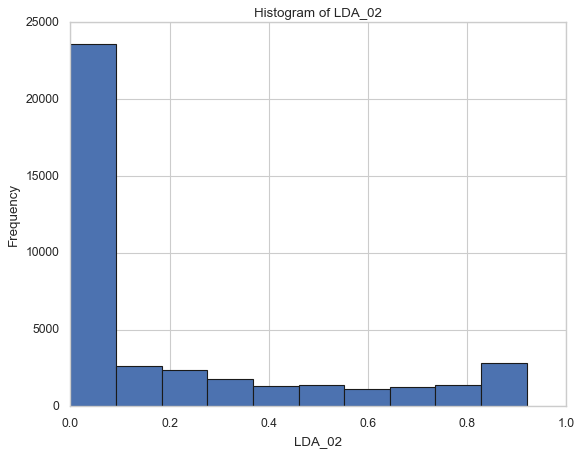

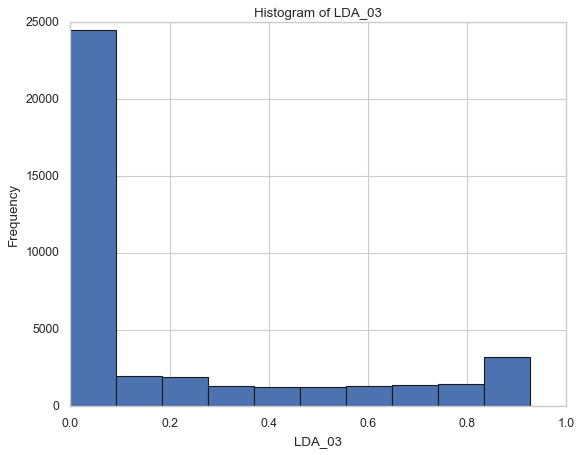

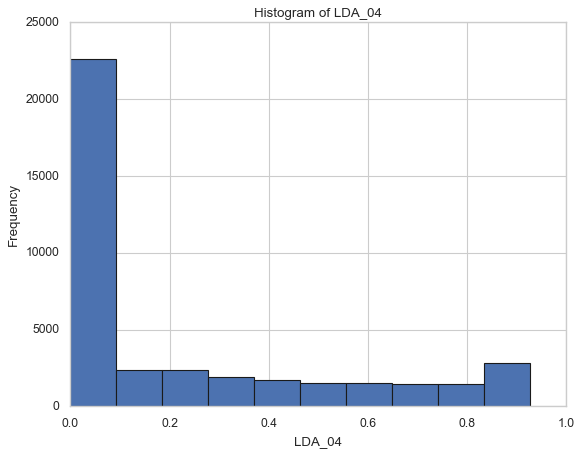

In [39]:
# LDA_00 - log transform did not help the skewness for LDAs

plt.hist(df['LDA_00'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('LDA_00')
plt.ylabel('Frequency')
plt.title('Histogram of LDA_00')
plt.grid(True)
plt.show()

plt.hist(df['LDA_01'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('LDA_01')
plt.ylabel('Frequency')
plt.title('Histogram of LDA_01')
plt.grid(True)
plt.show()

plt.hist(df['LDA_02'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('LDA_02')
plt.ylabel('Frequency')
plt.title('Histogram of LDA_02')
plt.grid(True)
plt.show()

plt.hist(df['LDA_03'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('LDA_03')
plt.ylabel('Frequency')
plt.title('Histogram of LDA_03')
plt.grid(True)
plt.show()

plt.hist(df['LDA_04'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('LDA_04')
plt.ylabel('Frequency')
plt.title('Histogram of LDA_04')
plt.grid(True)
plt.show()


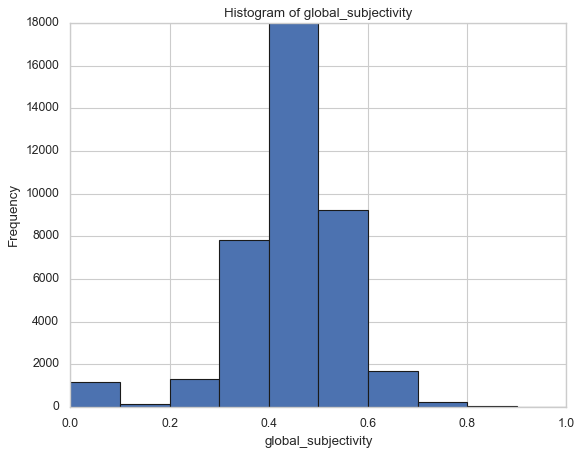

In [40]:
# global_subjectivity - looks normally distributed 

plt.hist(df['global_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('global_subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of global_subjectivity')
plt.grid(True)
plt.show()


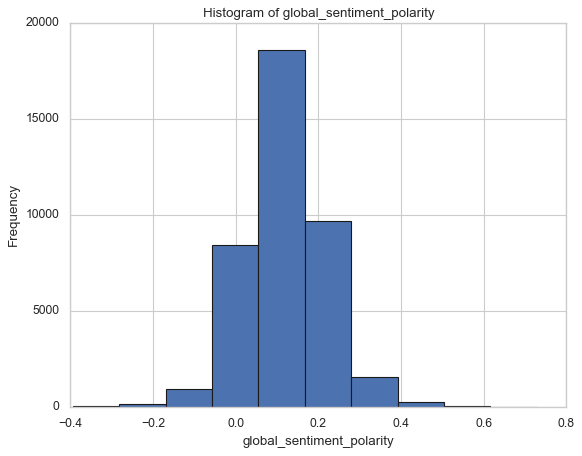

In [41]:
# global_sentiment_polarity - looks normally distributed 

plt.hist(df['global_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('global_sentiment_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of global_sentiment_polarity')
plt.grid(True)
plt.show()

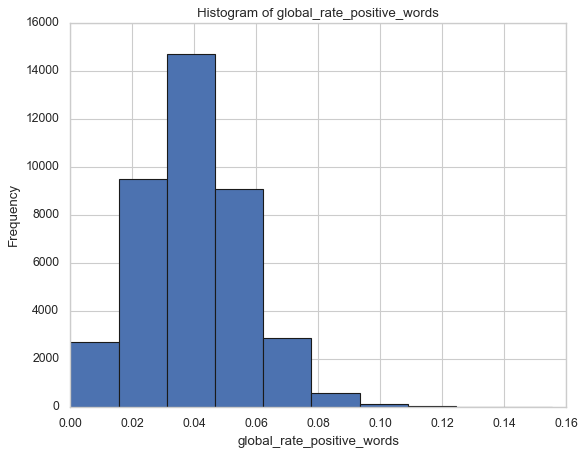

In [42]:
# global_sentiment_polarity - looks normally distributed 

plt.hist(df['global_rate_positive_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('global_rate_positive_words')
plt.ylabel('Frequency')
plt.title('Histogram of global_rate_positive_words')
plt.grid(True)
plt.show()


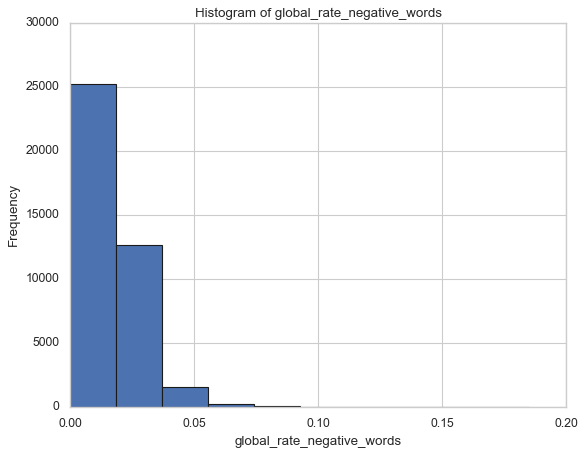

In [43]:
# global_rate_negative_words - log transformation did not help skewness

plt.hist(df['global_rate_negative_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('global_rate_negative_words')
plt.ylabel('Frequency')
plt.title('Histogram of global_rate_negative_words')
plt.grid(True)
plt.show()


# df['log_global_rate_negative_words'] = np.log1p(df['global_rate_negative_words'])
# plt.hist(df['log_global_rate_negative_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_global_rate_negative_words')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_global_rate_negative_words')
# plt.grid(True)
# plt.show()

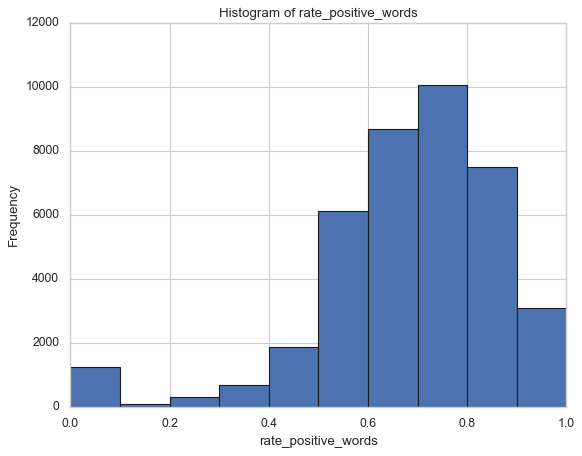

In [44]:
# rate_positive_words - log transformation did not help skewness

plt.hist(df['rate_positive_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('rate_positive_words')
plt.ylabel('Frequency')
plt.title('Histogram of rate_positive_words')
plt.grid(True)
plt.show()


# df['log_rate_positive_words'] = np.log1p(df['rate_positive_words'])
# plt.hist(df['log_rate_positive_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_rate_positive_words')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_rate_positive_words')
# plt.grid(True)
# plt.show()

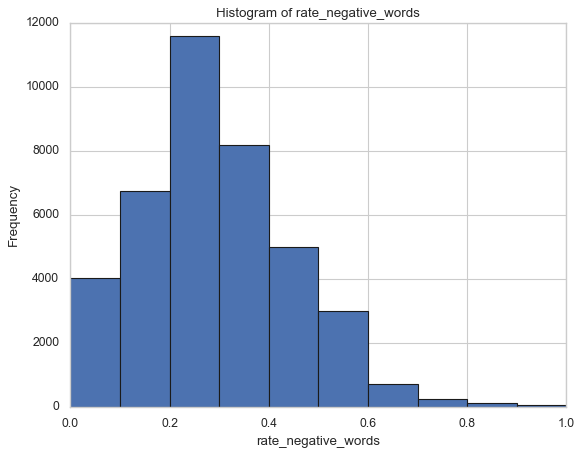

In [45]:
# rate_negative_words - log transformation did not help skewness

plt.hist(df['rate_negative_words'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('rate_negative_words')
plt.ylabel('Frequency')
plt.title('Histogram of rate_negative_words')
plt.grid(True)
plt.show()


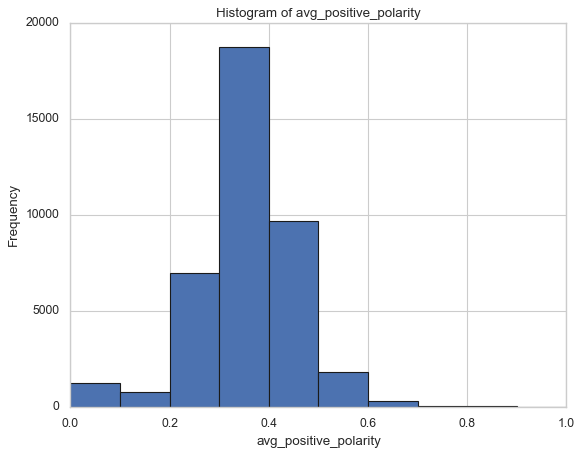

In [46]:
# avg_positive_polarity - normally distributed

plt.hist(df['avg_positive_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('avg_positive_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of avg_positive_polarity')
plt.grid(True)
plt.show()



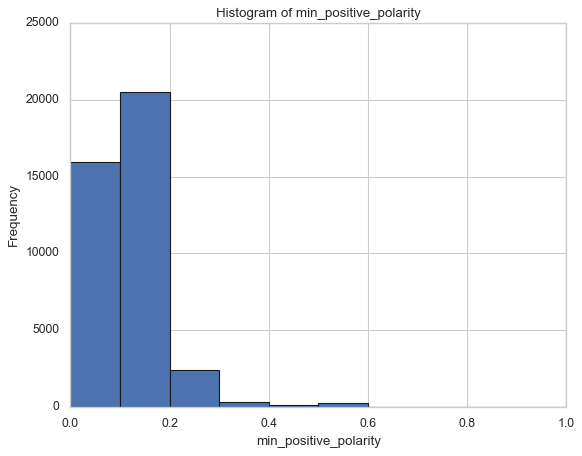

In [47]:
# min_positive_polarity - log transformation did not help skewness

plt.hist(df['min_positive_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('min_positive_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of min_positive_polarity')
plt.grid(True)
plt.show()


# df['log_min_positive_polarity'] = np.log1p(df['min_positive_polarity'])
# plt.hist(df['log_min_positive_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_min_positive_polarity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_min_positive_polarity')
# plt.grid(True)
# plt.show()

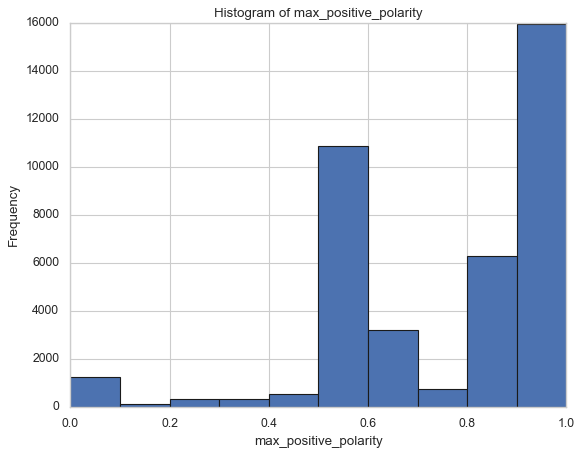

In [48]:
# max_positive_polarity - log transformation did not help skewness

plt.hist(df['max_positive_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('max_positive_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of max_positive_polarity')
plt.grid(True)
plt.show()


# df['log_max_positive_polarity'] = np.log1p(df['max_positive_polarity'])
# plt.hist(df['log_max_positive_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_max_positive_polarity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_max_positive_polarity')
# plt.grid(True)
# plt.show()

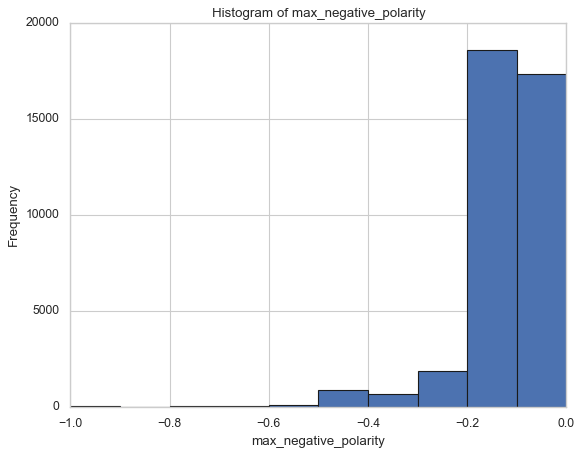

In [49]:
# max_negative_polarity - log transformation didnt work - range issue

plt.hist(df['max_negative_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('max_negative_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of max_negative_polarity')
plt.grid(True)
plt.show()



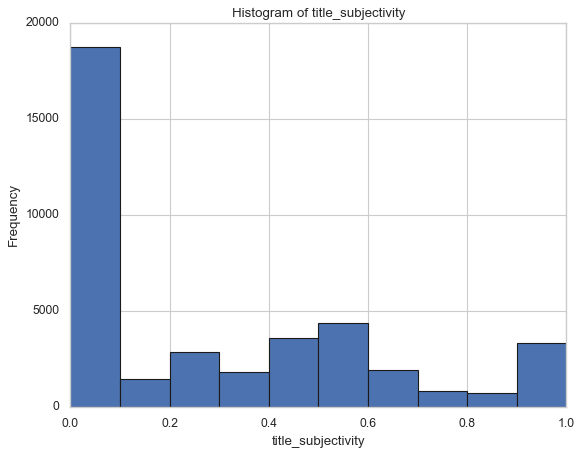

In [50]:
# title_subjectivity - log transformation did not help skewness

plt.hist(df['title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('title_subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of title_subjectivity')
plt.grid(True)
plt.show()


# df['log_title_subjectivity'] = np.log1p(df['title_subjectivity'])
# plt.hist(df['log_title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_title_subjectivity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_title_subjectivity')
# plt.grid(True)
# plt.show()

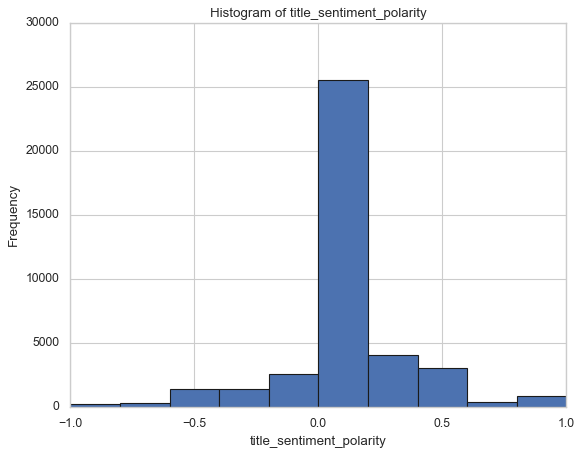

In [51]:
# title_sentiment_polarity - relatively normally distributed 

plt.hist(df['title_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('title_sentiment_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of title_sentiment_polarity')
plt.grid(True)
plt.show()


# df['log_title_subjectivity'] = np.log1p(df['title_subjectivity'])
# plt.hist(df['log_title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_title_subjectivity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_title_subjectivity')
# plt.grid(True)
# plt.show()

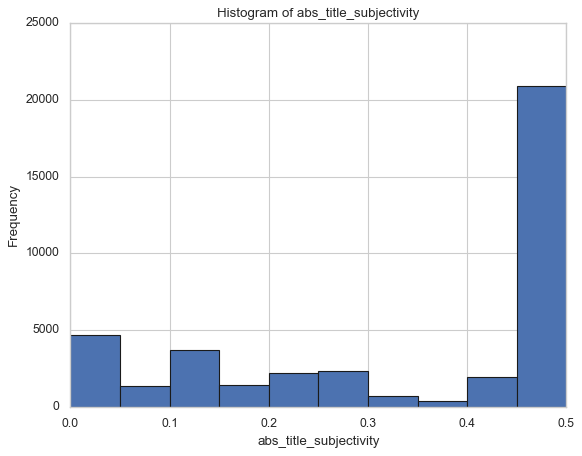

In [52]:
# abs_title_subjectivity -  left skewed 

plt.hist(df['abs_title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('abs_title_subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of abs_title_subjectivity')
plt.grid(True)
plt.show()


# df['log_abs_title_subjectivity'] = np.log1p(df['abs_title_subjectivity'])
# plt.hist(df['log_abs_title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_abs_title_subjectivity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_abs_title_subjectivity')
# plt.grid(True)
# plt.show()

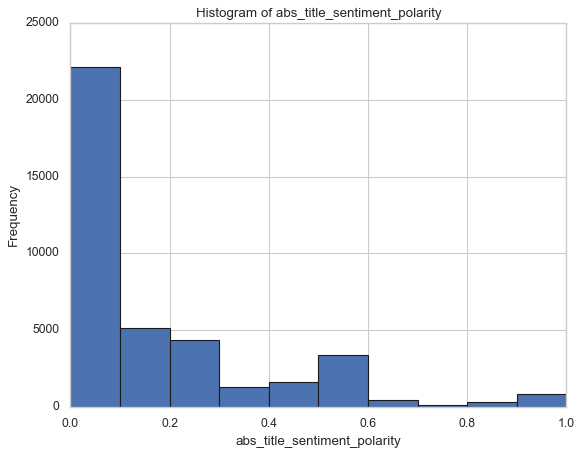

In [53]:
# abs_title_sentiment_polarity - right skewed

plt.hist(df['abs_title_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('abs_title_sentiment_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of abs_title_sentiment_polarity')
plt.grid(True)
plt.show()


# df['log_abs_title_sentiment_polarity'] = np.log1p(df['abs_title_sentiment_polarity'])
# plt.hist(df['log_abs_title_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_abs_title_sentiment_polarity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_abs_title_sentiment_polarity')
# plt.grid(True)
# plt.show()

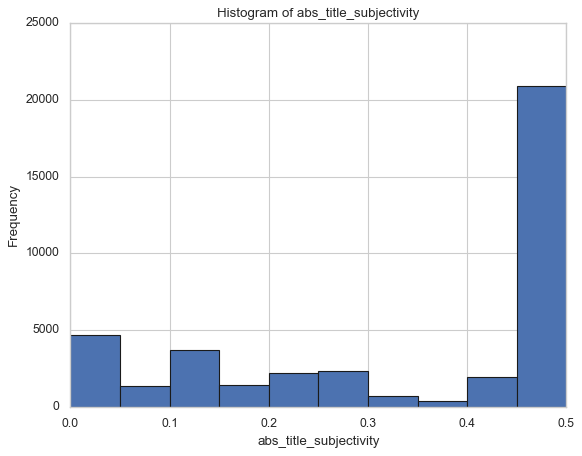

In [54]:
# abs_title_subjectivity - left skewed or kinda u-shaped

plt.hist(df['abs_title_subjectivity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('abs_title_subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of abs_title_subjectivity')
plt.grid(True)
plt.show()


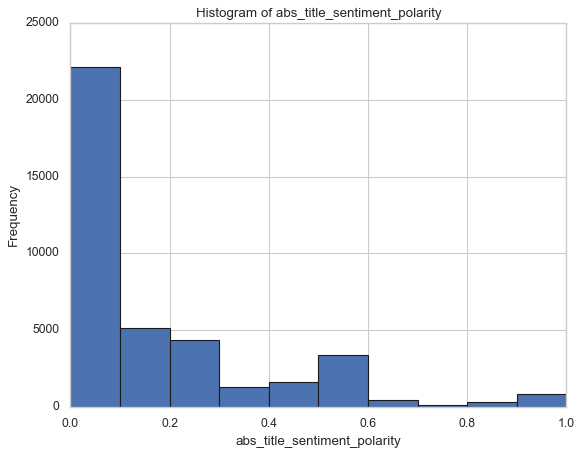

In [55]:
# abs_title_sentiment_polarity - right skewed

plt.hist(df['abs_title_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('abs_title_sentiment_polarity')
plt.ylabel('Frequency')
plt.title('Histogram of abs_title_sentiment_polarity')
plt.grid(True)
plt.show()


# df['log_abs_title_sentiment_polarity'] = np.log1p(df['abs_title_sentiment_polarity'])
# plt.hist(df['log_abs_title_sentiment_polarity'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
# plt.xlabel('log_abs_title_sentiment_polarity')
# plt.ylabel('Frequency')
# plt.title('Histogram of log_abs_title_sentiment_polarity')
# plt.grid(True)
# plt.show()

In [56]:
df.columns

Index(['url_name', 'date', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polar

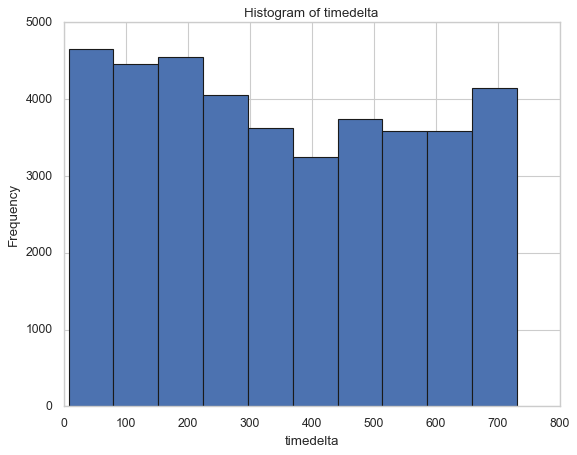

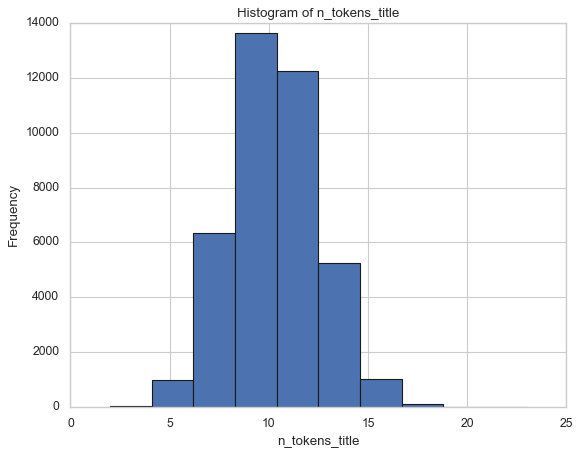

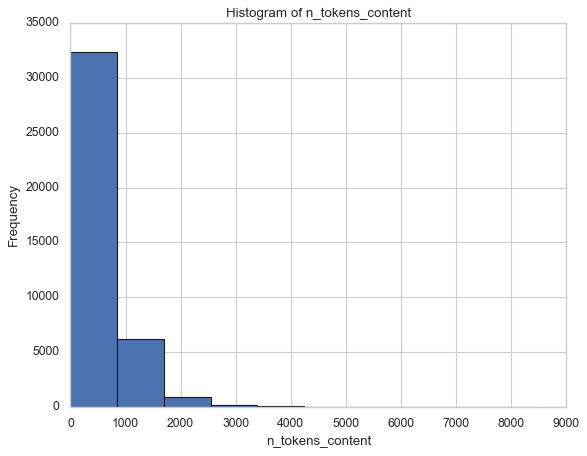

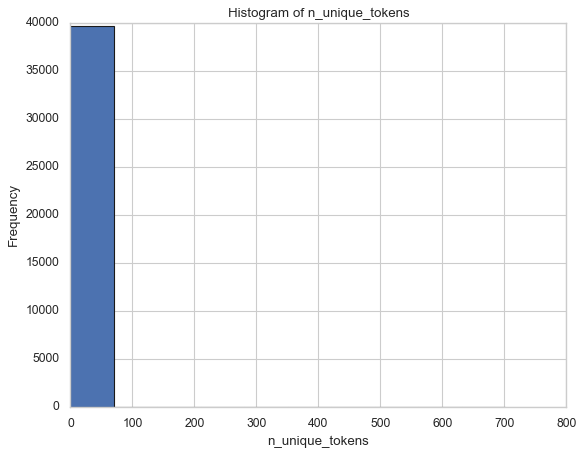

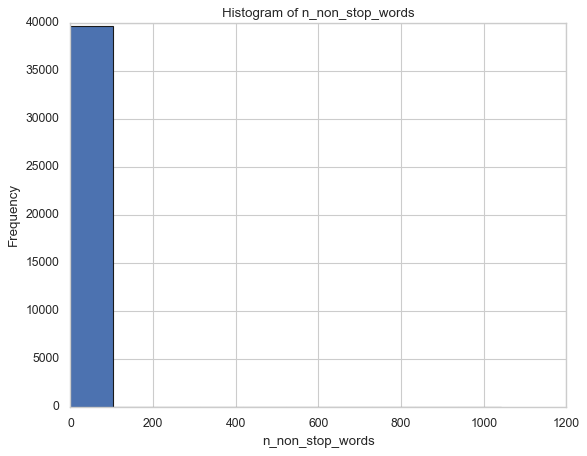

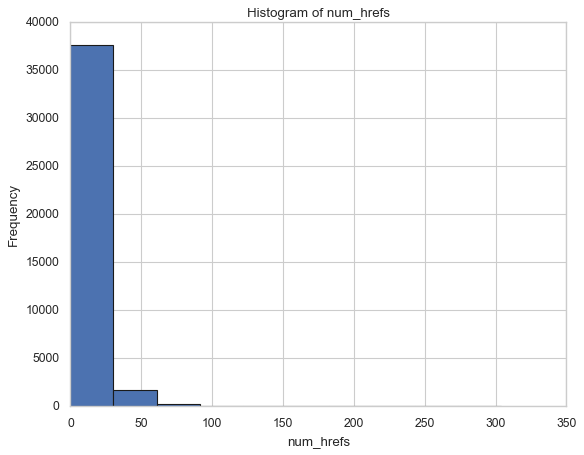

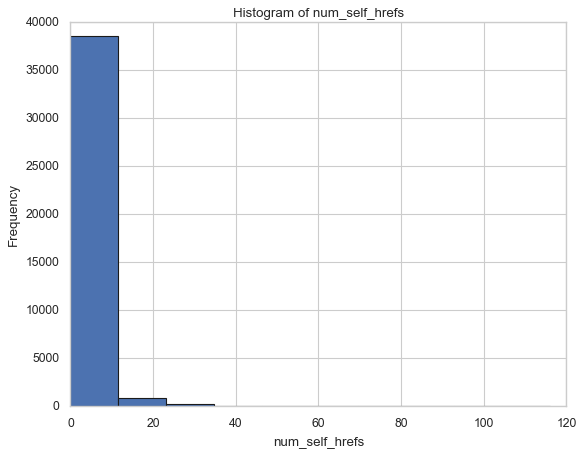

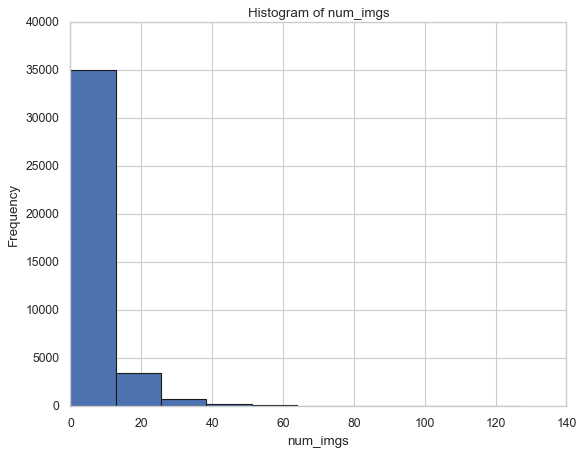

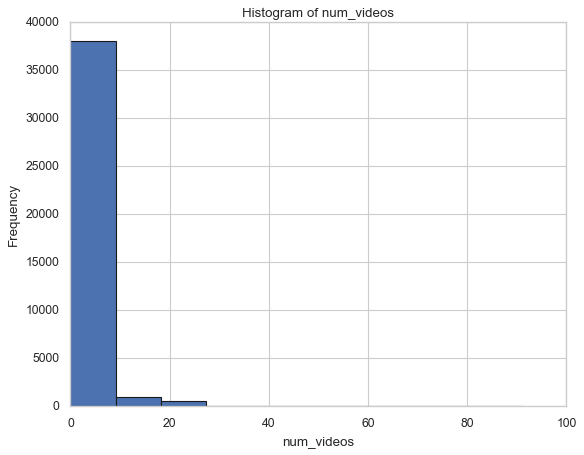

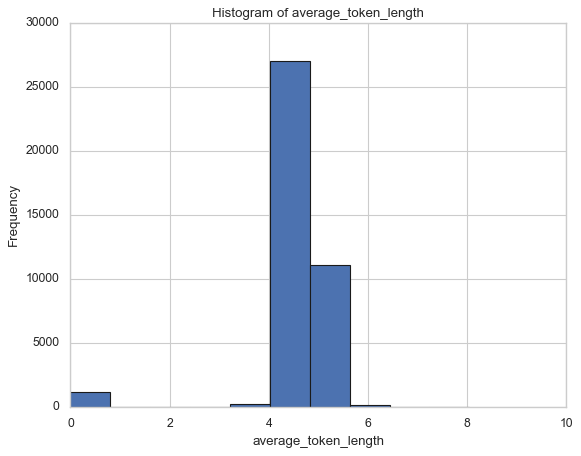

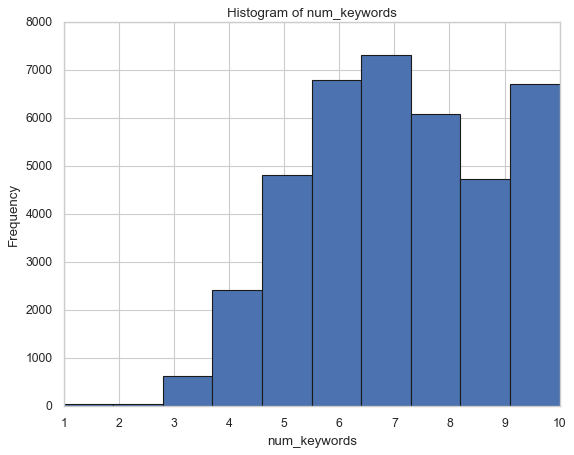

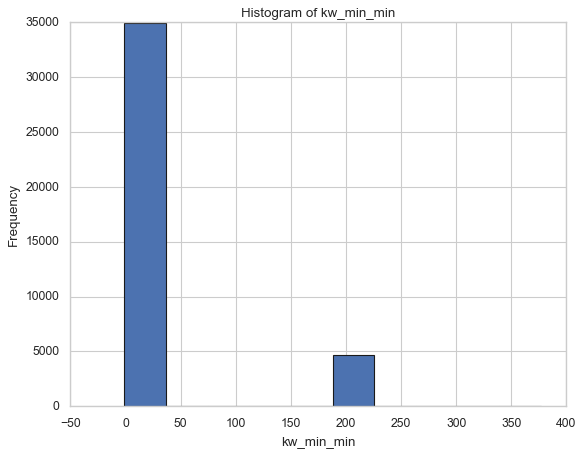

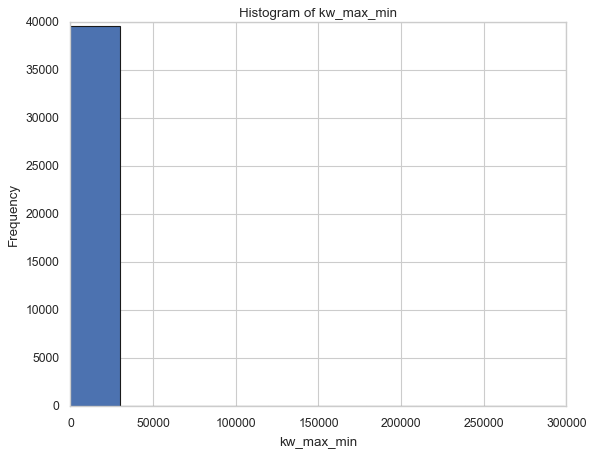

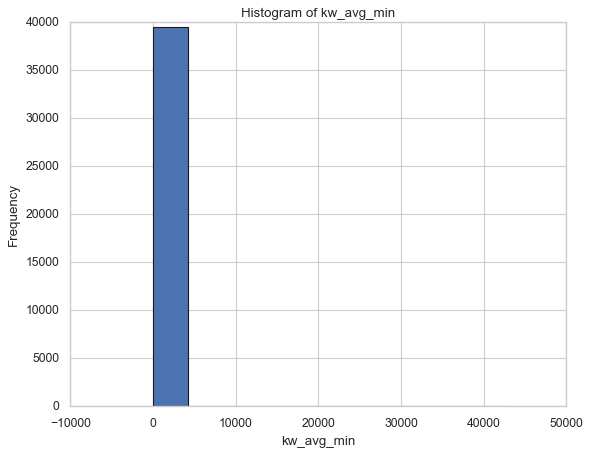

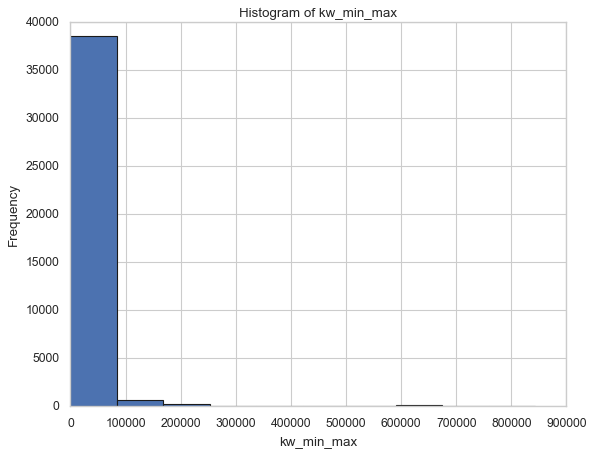

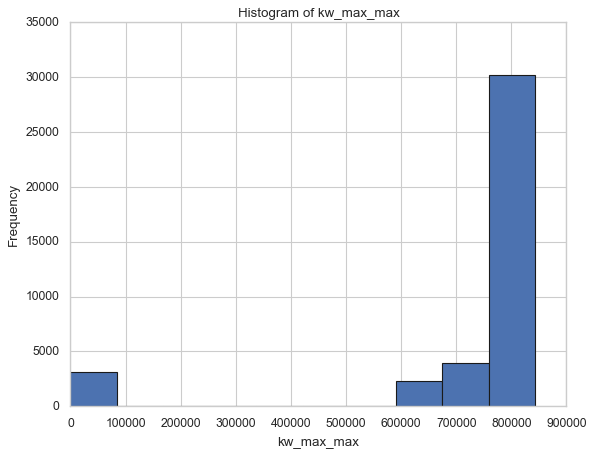

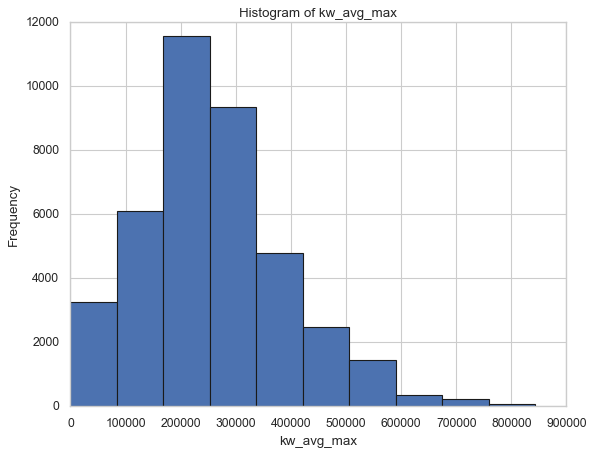

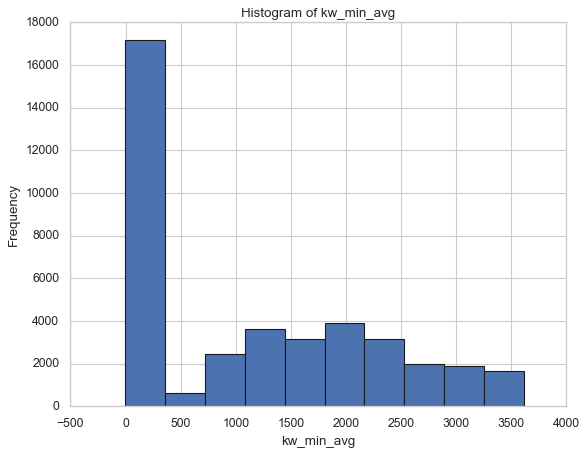

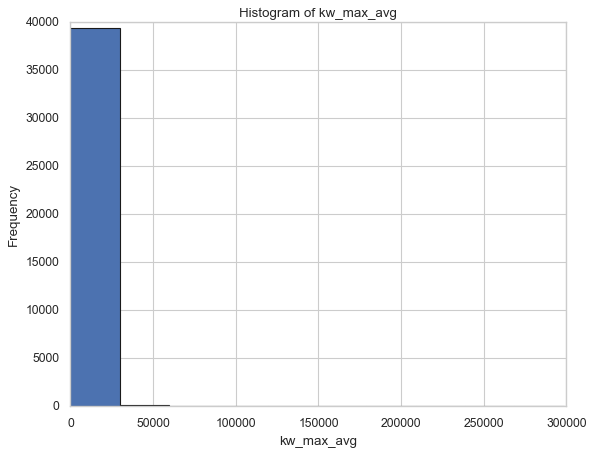

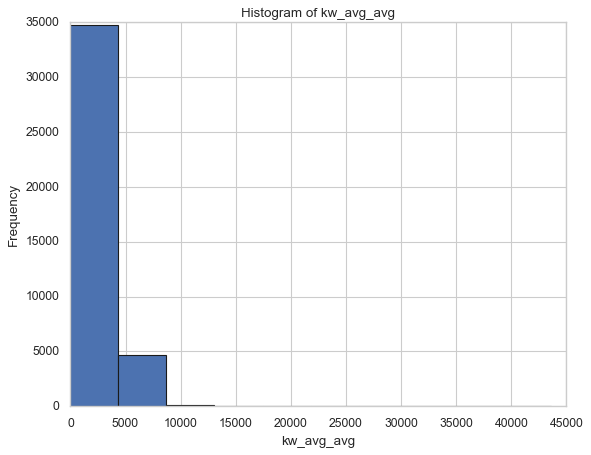

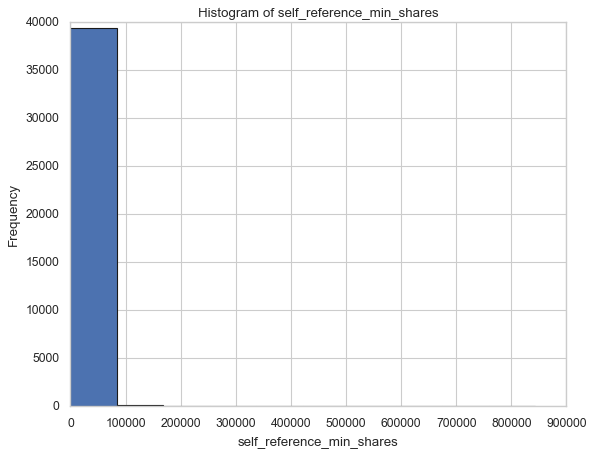

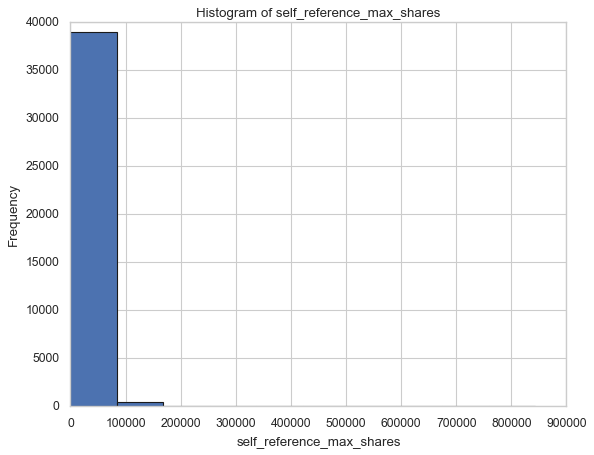

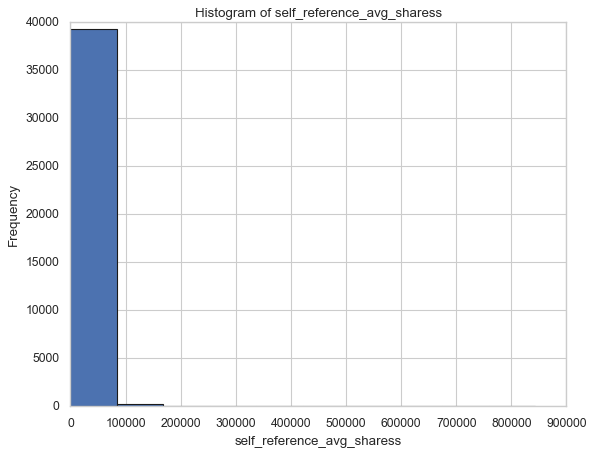

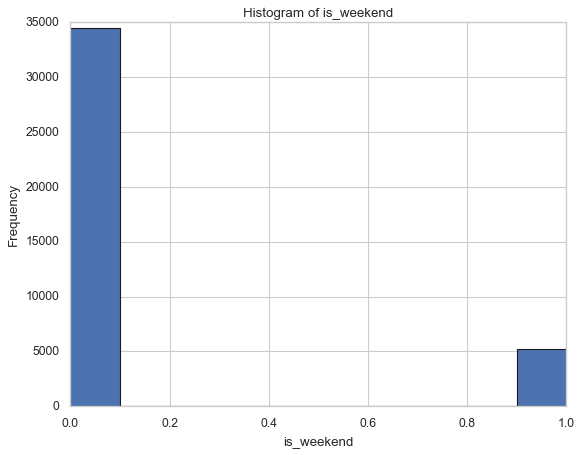

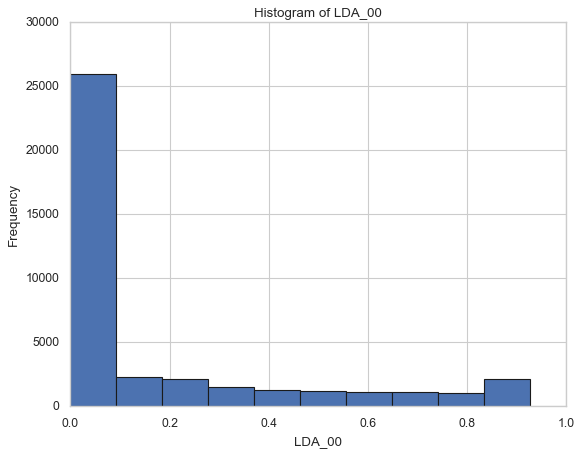

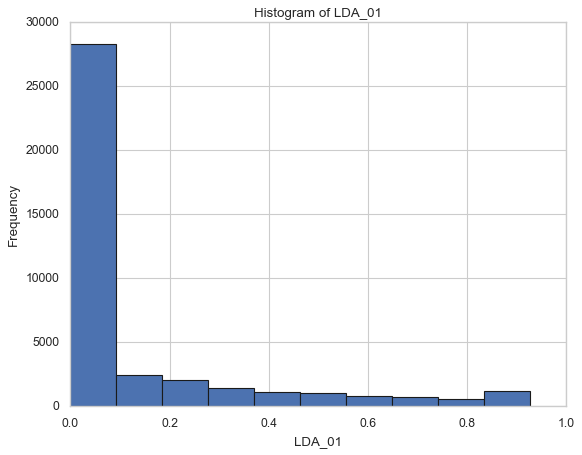

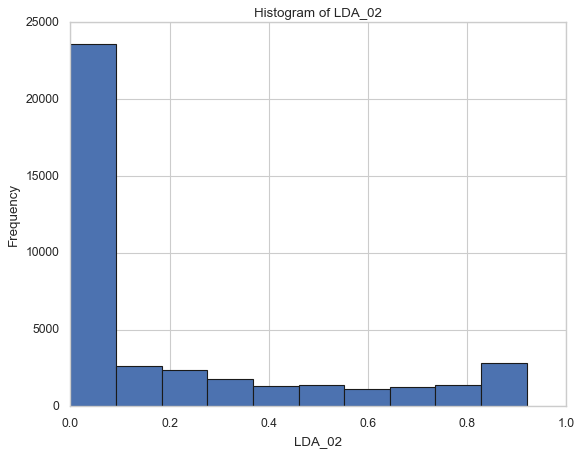

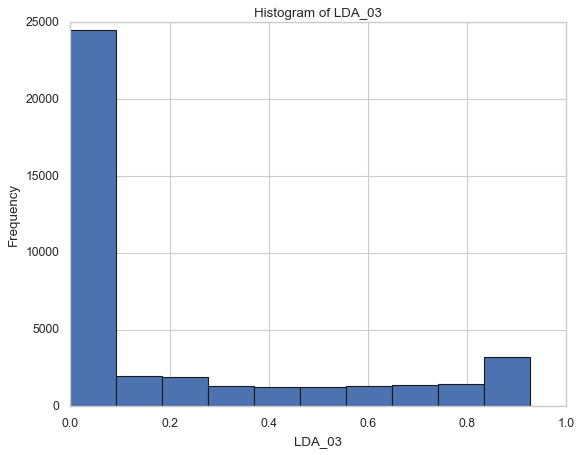

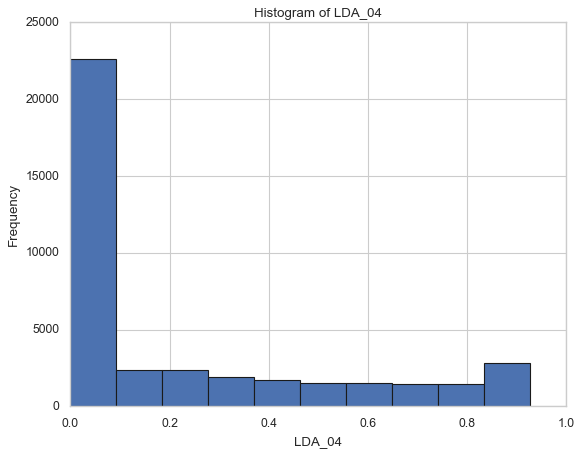

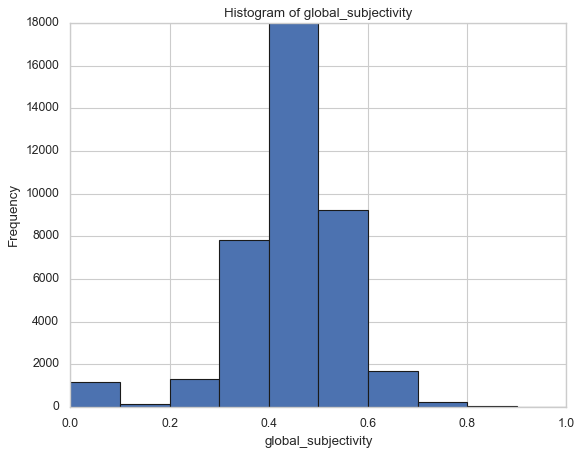

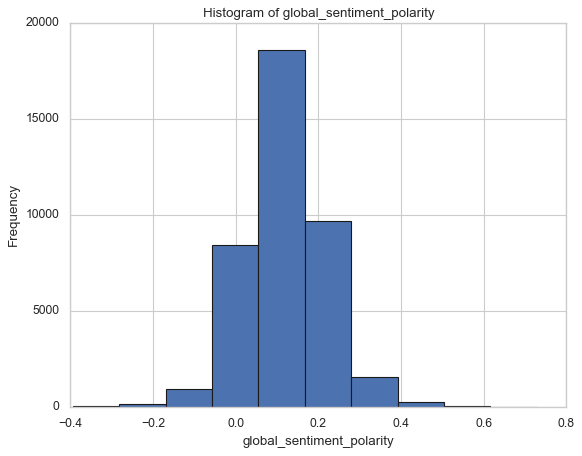

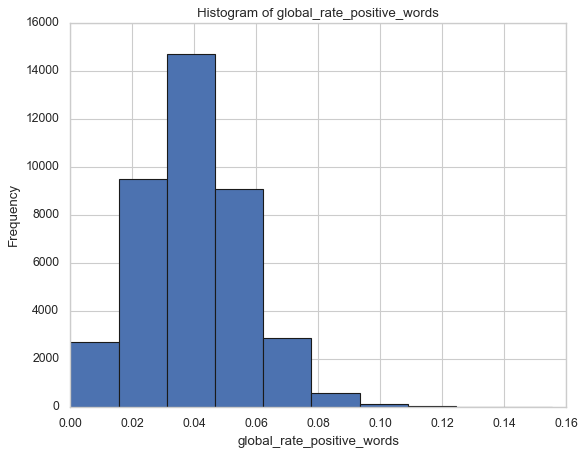

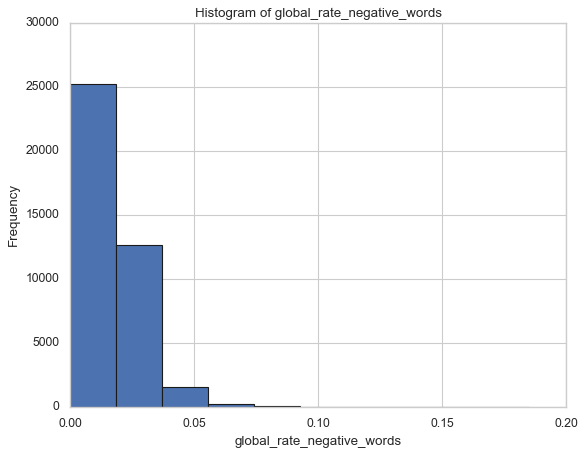

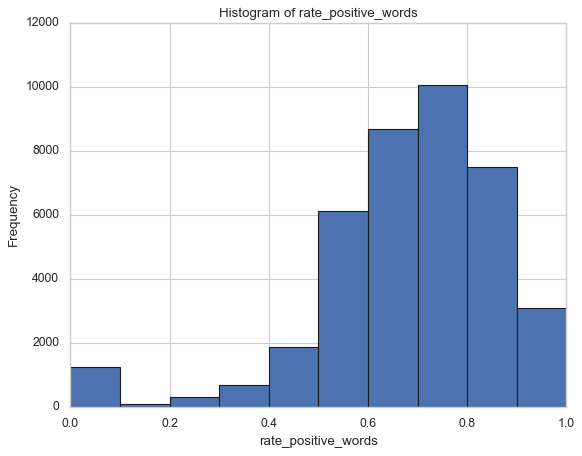

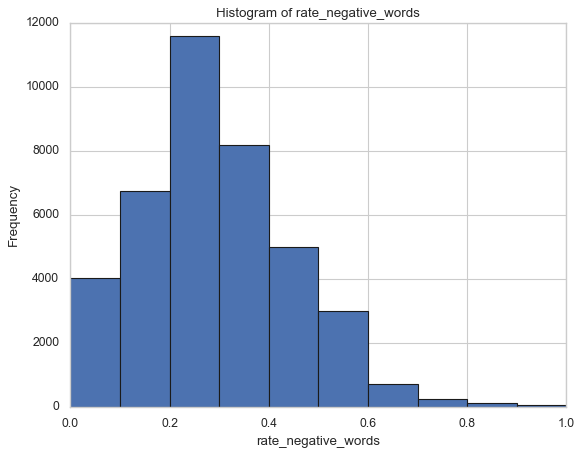

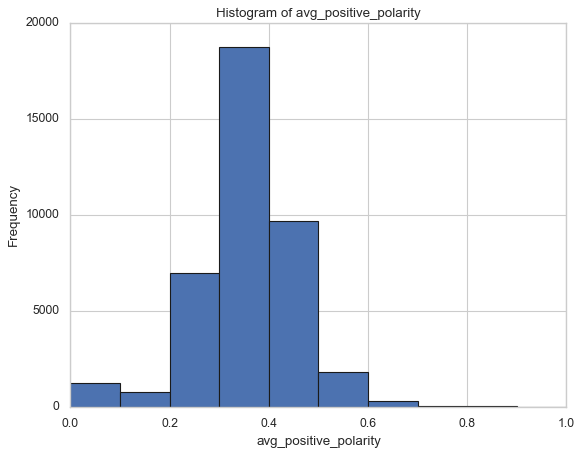

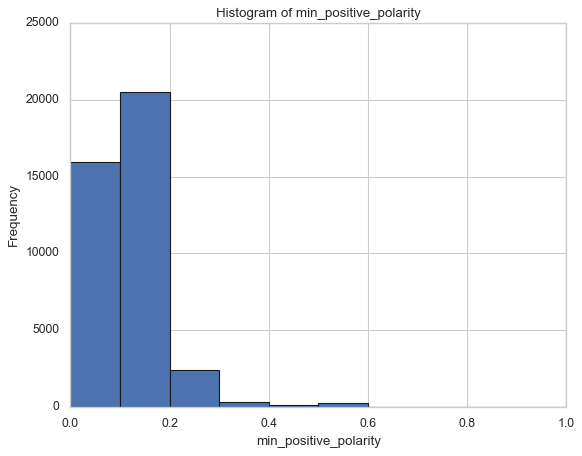

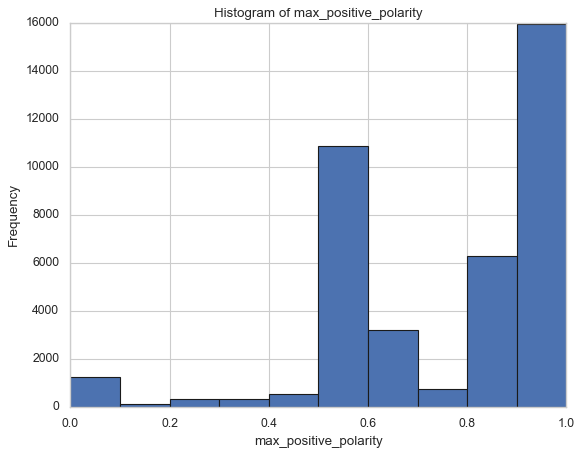

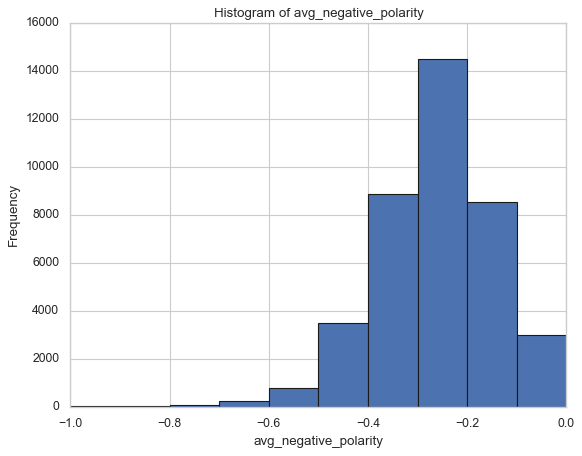

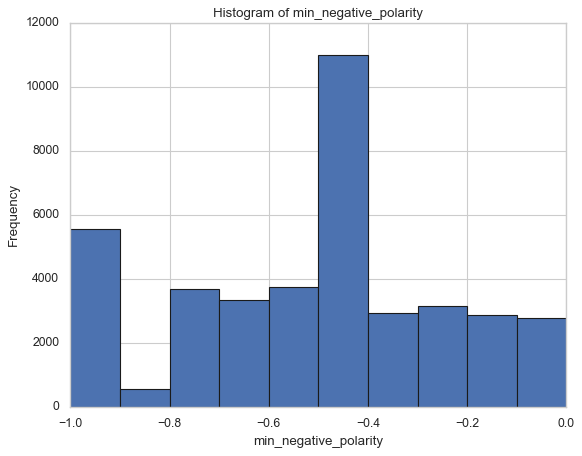

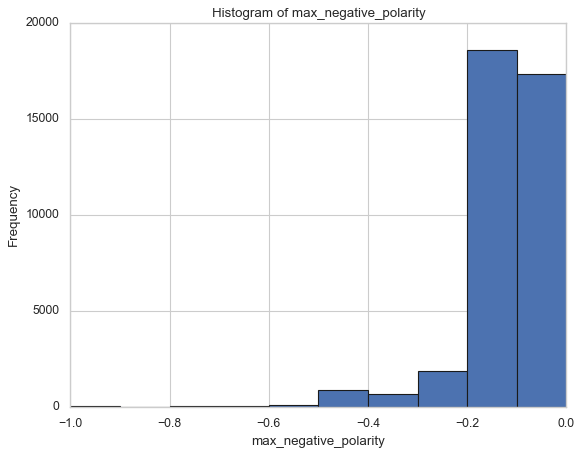

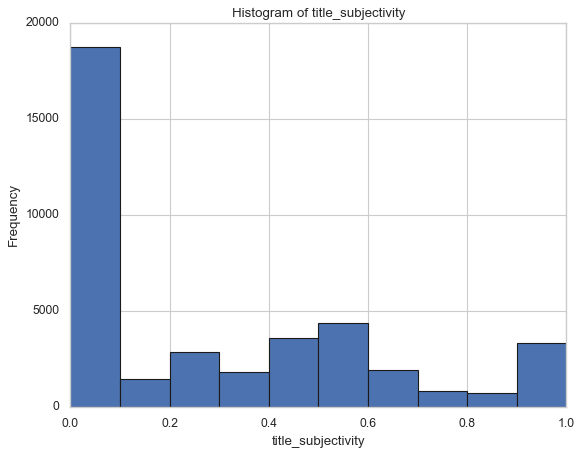

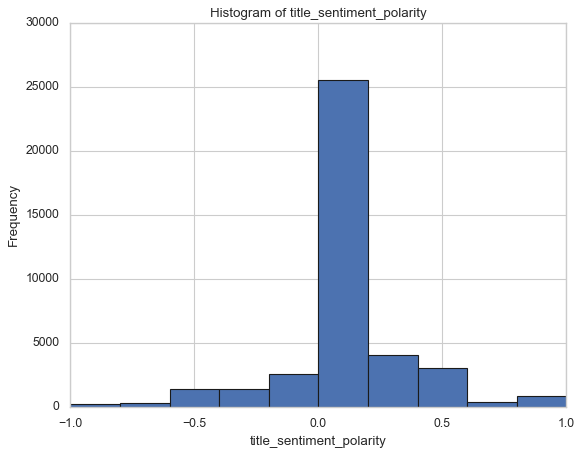

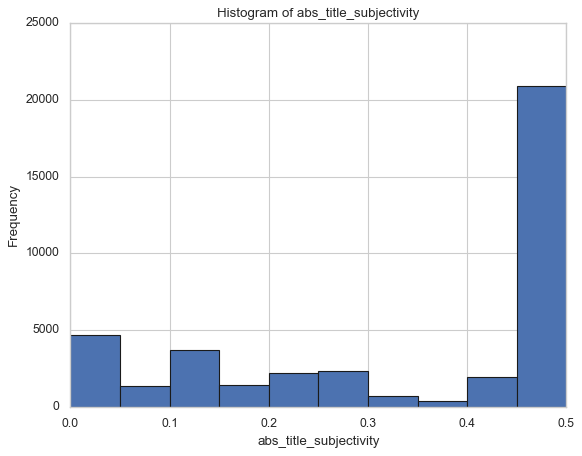

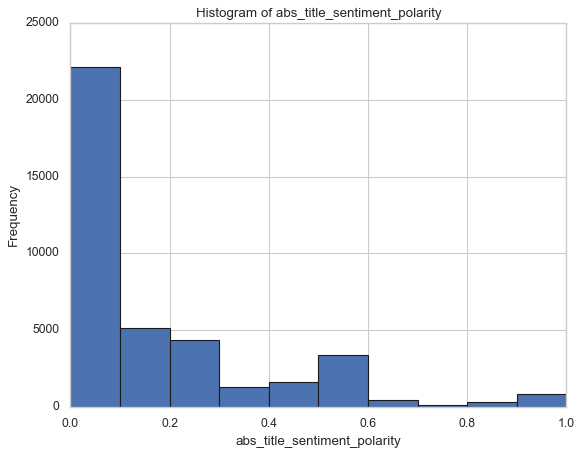

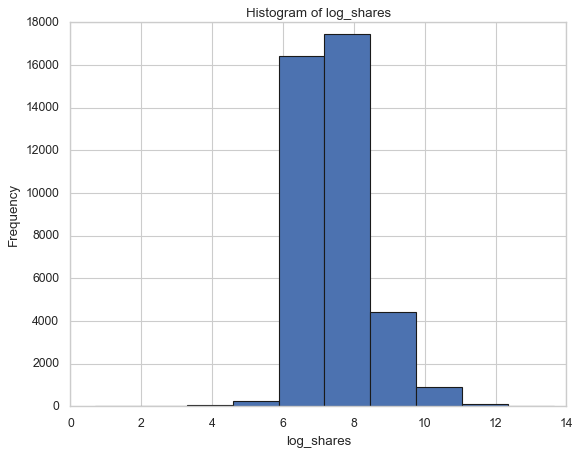

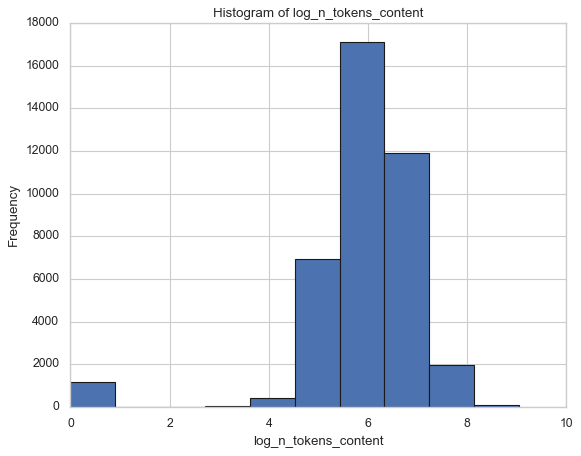

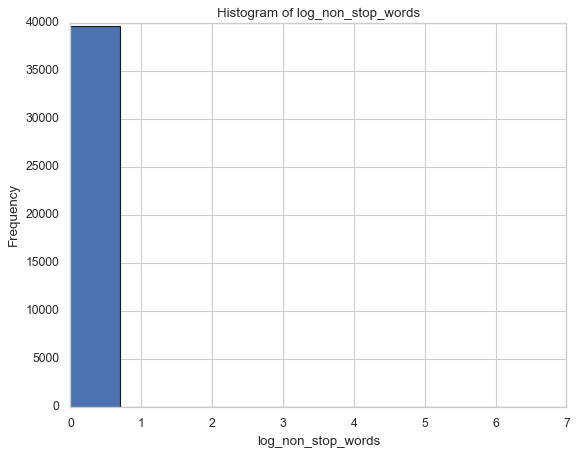

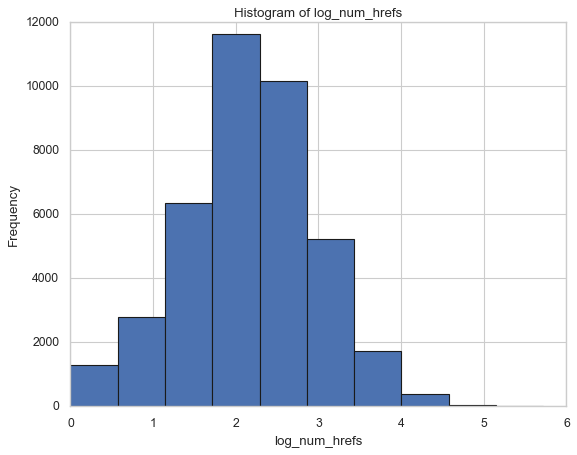

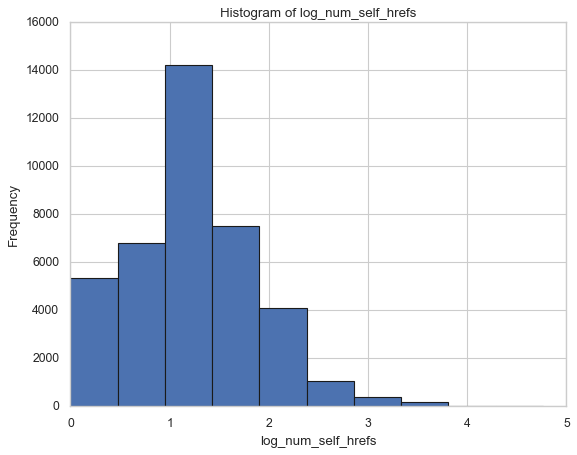

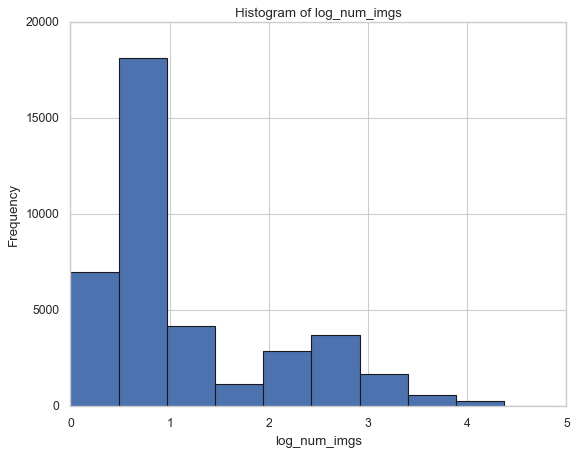

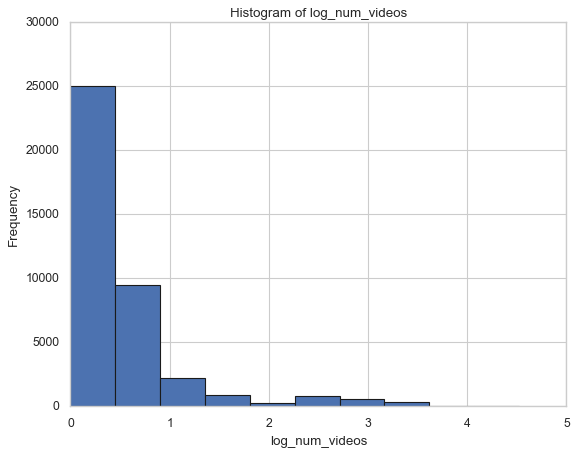

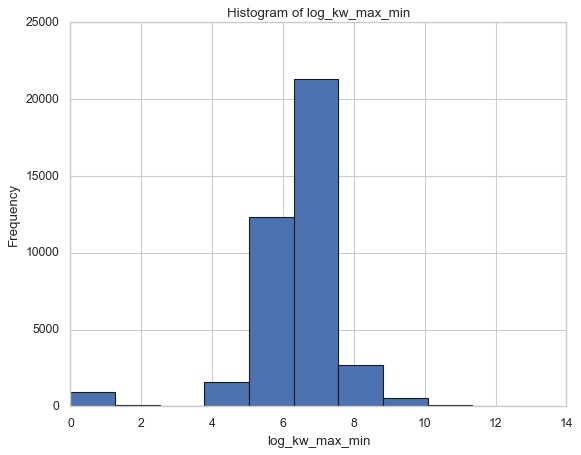

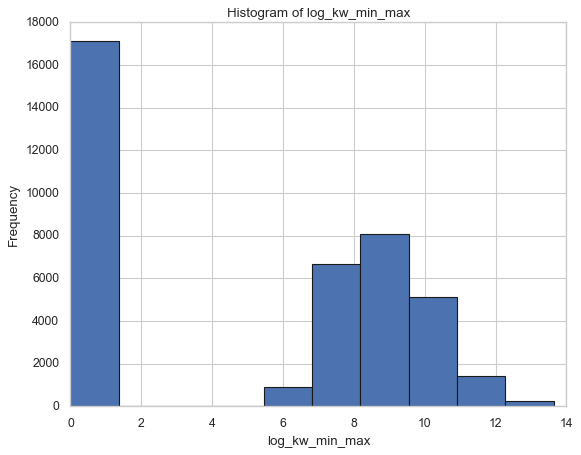

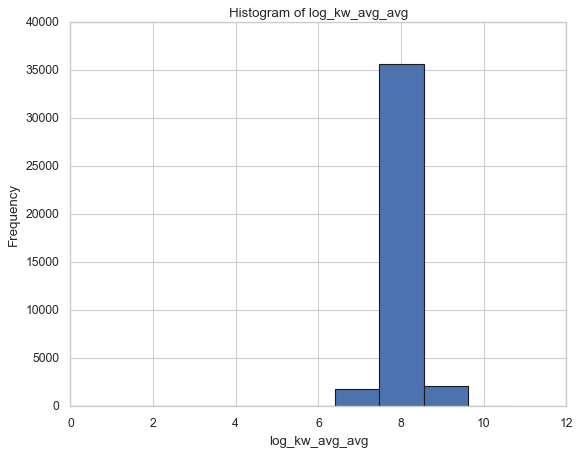

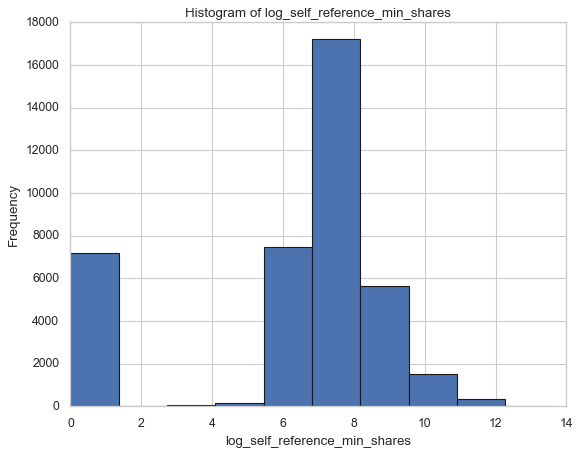

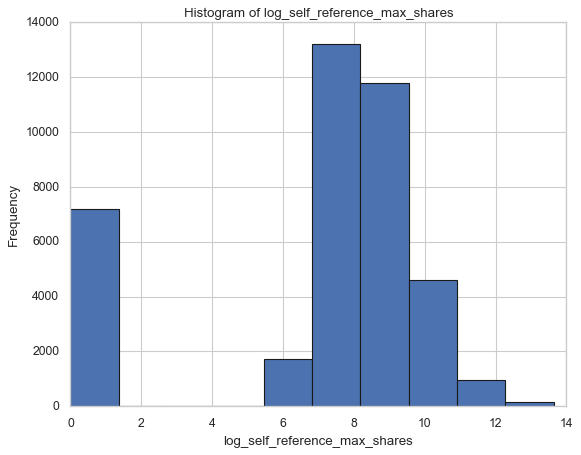

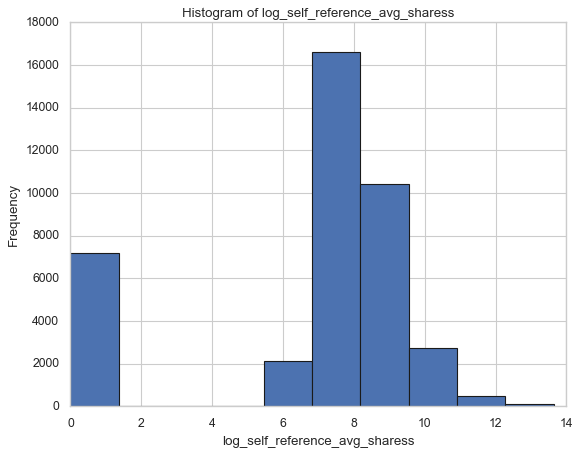

In [57]:
# Loop through all continous varaible columns get their frequency counts

# Assuming df is your DataFrame with the continuous variables
continuous_columns = df.select_dtypes(include=['float64']).columns

for column in continuous_columns:
    plt.hist(df[column], bins=10, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

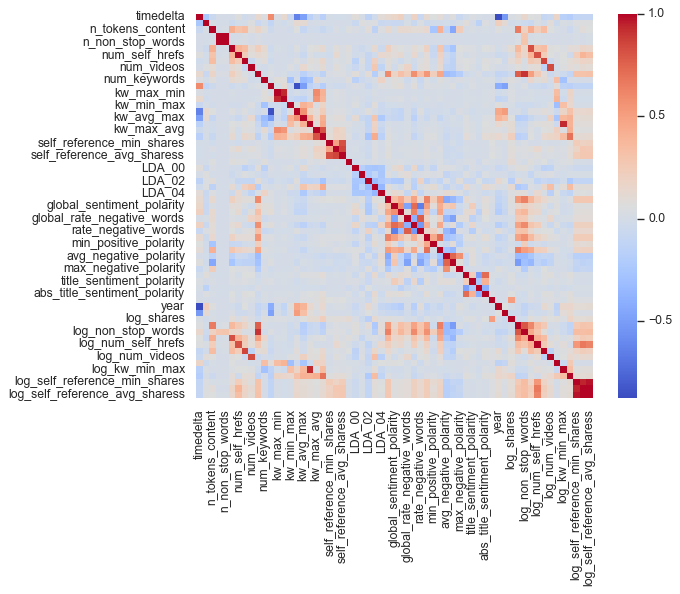

In [58]:
# Create a correlation matrix
corr = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [59]:
# remove pre-transformed data (can only run once)
columns_to_drop = [
    'shares', 'n_tokens_content', 'n_non_stop_words', 'log_non_stop_words',
    'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'kw_max_min', 'kw_min_max',
    'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
57,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
56,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
55,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
54,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


In [60]:
df.to_csv('../Data/ONPClean2.csv', index=False)
